自分用に適当にコードを書いているため、説明が分かりにくいかもしれません。質問は
yutaka.higashis3@gmail.comもしくは、yutaka.higashis10@gmail.comまでお願い致します。

①ノートパソコンで作業しており、メモリ容量の関係から、データを使うときは毎回getdfsモジュールからデータをロードし、使用後はdel関数でメモリ消去をしています。高性能なPCで使う分にはdelしなくてもいいかもしれません。

## ライブラリ

In [1]:
import csv
import datetime as dt
import math
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib import cm

from pylab import rcParams
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize

#自作モジュール用フォルダにパスを通す
print(os.getcwd())
module_path = os.getcwd()[:-len('notebook')] + 'my_module'
print(module_path)
sys.path.append(module_path)

#自作モジュールと、モジュールアップデート用
#(importlib.reloadをしないとモジュールを書き換えても反映されないため)
import trendline
import dispgraphs
import importlib
import graph_settings
import getdfs
import calcdischarge
import ashida_michiue

importlib.reload(trendline)
importlib.reload(dispgraphs)
importlib.reload(graph_settings)
importlib.reload(getdfs)
importlib.reload(calcdischarge)
importlib.reload(ashida_michiue)


C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\notebook
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\my_module


<module 'ashida_michiue' from 'C:\\Users\\user\\OneDrive - Kyoto University\\shared-Yutaka\\Research\\Hydrophone\\my_module\\ashida_michiue.py'>

## グラフセッティング

In [2]:
graph_settings.setsettings()

## 初期値設定

In [3]:
print(os.getcwd())
PATH_SAVE_GRAPHS = os.getcwd()[:-len('notebook')] + 'graphs_for_seminars/' + '11.14.seminar/'
print(PATH_SAVE_GRAPHS)

C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\notebook
C:\Users\user\OneDrive - Kyoto University\shared-Yutaka\Research\Hydrophone\graphs_for_seminars/11.14.seminar/


In [4]:
USE_YEAR = '2017_2018'
# USE_YEAR = '2017'
# USE_YEAR = '2018'

In [5]:
# ハイドロフォン長さ
length_hp_m = 0.275
length_C_m = 0.5
pit_width = 0.2
Dv = 0.0125
Dh = 0.0125

W_IDEAL = np.array([0.15, 0.22, 0.29, 0.65, 0.91, 1.96, 3.01, 6.91, 10.81, 30])*0.001
TARGET_TOT = ['-2mm', '3-5mm', '5-6mm', '6-7mm', '7-8.5mm', '8.5-10mm', '10-12.5mm', '12.5-15mm', '15-20mm', '25-30mm', '30mm-']


event_marker = ['.', 'x', 'v', '1', 'D']

suffix = ['_Tot(1)', '_Tot(2)', '_Tot(3)', '_Tot(4)', '_Tot(5)',
            '_Tot(6)', '_Tot(7)', '_Tot(8)', '_Tot(9)', '_Tot(10)']

# 直上中央ハイドロフォン
names_of_center = ['hp'+ s for s in suffix]
# 中央ハイドロフォン
names_of_C = ['C'+ s for s in suffix]
# 中央右ハイドロフォン
names_of_RC = ['RC'+ s for s in suffix]
# 中央左ハイドロフォン
names_of_LC = ['LC'+ s for s in suffix]
# 右ハイドロフォン
names_of_R = ['R'+ s for s in suffix]
# 左ハイドロフォン
names_of_L = ['L'+ s for s in suffix]

# 右鉛直ハイドロフォン
names_of_VR = ['VR'+ s for s in suffix]
# 左鉛直ハイドロフォン
names_of_VL = ['VL'+ s for s in suffix]


# Corrected直上中央ハイドロフォン
names_of_center_Corrected = ['Corrected_hp'+ s for s in suffix]
# Corrected中央ハイドロフォン
names_of_C_Corrected = ['Corrected_C'+ s for s in suffix]
# Corrected中央右ハイドロフォン
names_of_RC_Corrected = ['Corrected_RC'+ s for s in suffix]
# Corrected中央左ハイドロフォン
names_of_LC_Corrected = ['Corrected_LC'+ s for s in suffix]
# Corrected右ハイドロフォン
names_of_R_Corrected = ['Corrected_R'+ s for s in suffix]
# Corrected左ハイドロフォン
names_of_L_Corrected = ['Corrected_L'+ s for s in suffix]



# スロットナンバーと倍率を対応させる
amplification_factor = {'Tot(1)': '1024', 'Tot(2)': '512', 'Tot(3)': '256', 'Tot(4)': '128',
                        'Tot(5)': '64', 'Tot(6)': '32', 'Tot(7)': '16', 'Tot(8)': '8',
                        'Tot(9)': '4', 'Tot(10)': '2'}

# データインポート

In [6]:
if USE_YEAR == '2017_2018':
    cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference', 'WaterLevel(cm)', 'Velocity(m/s)']

    print('COL_USE :' +  str(cols_use))

    df2017 = getdfs.get2017method2cleanedmean_pit_true()
    df2017 = df2017[cols_use]

    list_df2018_3events = getdfs.get2018_3events_method2_mean()
    for i, df2018_each in enumerate(list_df2018_3events):
        list_df2018_3events[i] = df2018_each[cols_use]

    df_all = pd.DataFrame()
    df_all = df_all.append(df2017)
    del df2017

    for i, df2018_each in enumerate(list_df2018_3events):
        df_all = df_all.append(df2018_each)

    del list_df2018_3events
    
elif USE_YEAR == '2017':
    cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference']

    print('COL_USE :' +  str(cols_use))

    df2017 = getdfs.get2017method2cleanedmean_pit_true()
    df2017 = df2017[cols_use]
    df_all = pd.DataFrame()
    df_all = df_all.append(df2017)
    del df2017
    
elif USE_YEAR == '2018':
    df_all = pd.DataFrame()
    for i, df2018_each in enumerate(list_df2018_3events):
        df_all = df_all.append(df2018_each)

    del list_df2018_3events


COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference', 'WaterLevel(cm)', 'Velocity(m/s)']
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [7]:
list_df2018_3events = getdfs.get2018_3events_method2_mean()
for i, df2018_each in enumerate(list_df2018_3events):
    list_df2018_3events[i] = df2018_each[cols_use]
    
df_2018 = pd.DataFrame()
for i, df2018_each in enumerate(list_df2018_3events):
        df_2018 = df_2018.append(df2018_each)

I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [8]:
list_of2017_8events = getdfs.get2017_8events_method2_mean()

I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [9]:
# df_all[names_of_center].mul(W_IDEAL.reshape(1,10)).sum(axis=1).sum()

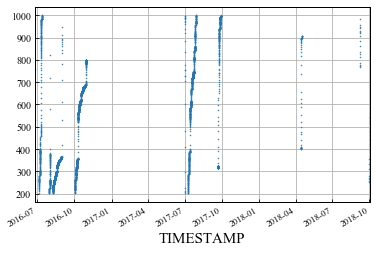

In [10]:
dispgraphs.time_series_graph(df_all, col_name='Load_Avg')

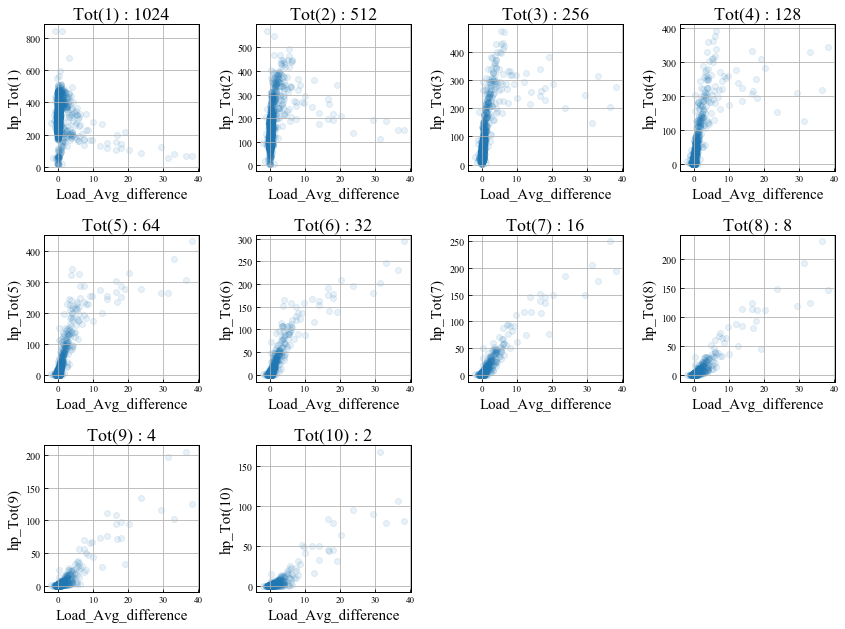

In [11]:
dispgraphs.scatter_graphs(df_all, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.1)

Load_Avg_differenceは0以上でなければいけない→マイナスはエラー、削除

(-1, 1)

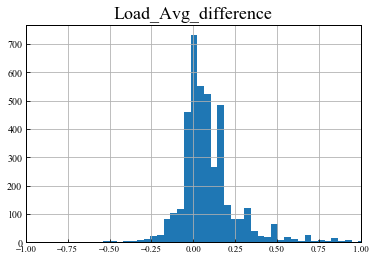

In [12]:
df_all.hist(column='Load_Avg_difference', bins=1000)
plt.xlim(-1,1)

In [13]:
df_all_plus = df_all[df_all['Load_Avg_difference'] >= 0]

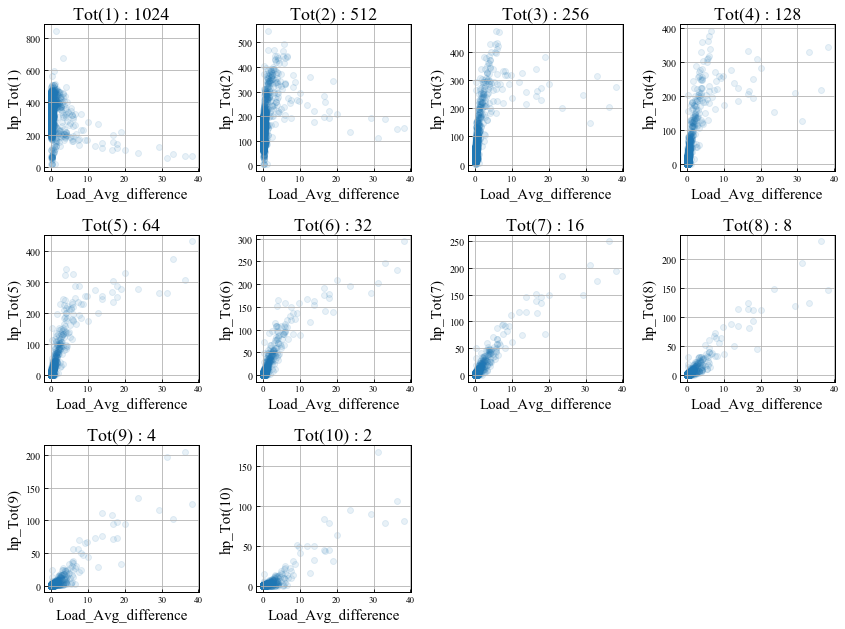

In [14]:
dispgraphs.scatter_graphs(df_all_plus, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.1)

'Load_Avg_difference'== 0のデータが多い。このデータ全て用いて最小化問題を解くと、過学習してしまう恐れがある。

(-1, 1)

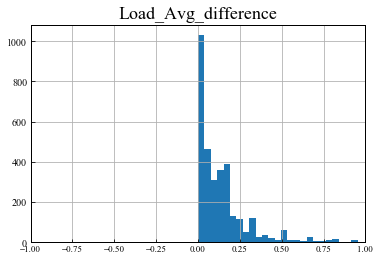

In [15]:
df_all_plus.hist(column='Load_Avg_difference', bins=1000)
plt.xlim(-1,1)

この過学習を防ぐために'Load_Avg_difference'== 0のデータを除外する(流砂量がある時のみを対象にするということ)

In [16]:
df_all_plus_during_events = df_all_plus[df_all_plus['Load_Avg_difference']>0.2]

In [17]:
len(df_all_plus_during_events)

809

In [18]:
df_2018_plus = df_2018[df_2018['Load_Avg_difference'] >= 0]

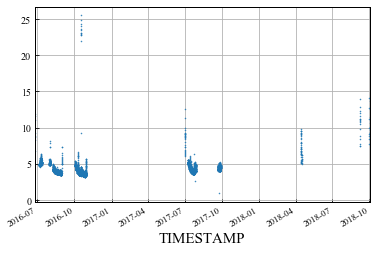

In [97]:
dispgraphs.time_series_graph(df_all, col_name='WaterLevel(cm)')

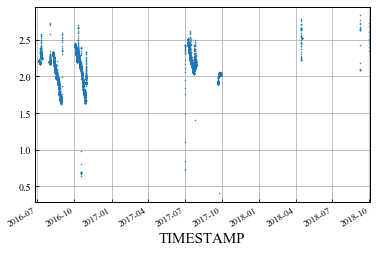

In [99]:
dispgraphs.time_series_graph(df_all, col_name='Velocity(m/s)')

上図から、飽和はLoad_Avg_difference > 0.5で起きていると考えられる(Tot(1)は救いようが無く無視)ので、その時のデータのみを抽出

# 最小化問題を解く

## 10個すべてのチャンネルを使う

In [19]:
W_IDEAL

array([0.00015, 0.00022, 0.00029, 0.00065, 0.00091, 0.00196, 0.00301,
       0.00691, 0.01081, 0.03   ])

https://org-technology.com/posts/scipy-constrained-minimization-of-multivariate-scalar-functions.html

In [20]:
from scipy.optimize import minimize


alpha = 0.42
def func(Const):
    cost = 0
#     df_w = df_all_plus_during_events[names_of_center].mul(W_IDEAL.reshape(1,10))
    df_w = df_all_plus_during_events[names_of_center].mul(W_IDEAL.reshape(1,10))
    df_w_corrected = df_w.mul(Const[:-1].reshape(1,10))
    df_w_corrected_sum = df_w_corrected.sum(axis=1)
    
    df_qcalc = df_w_corrected_sum * (1/((1-alpha)*(1-Const[-1])))
#     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
#     cost = np.square(df_qcalc-df_all_plus['Load_Avg_difference'])
    cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
#     cost = np.log(np.abs(np.log1p(df_qcalc)-np.log1p(df_all_plus['Load_Avg_difference'])))

    Cost = cost.sum()
    return Cost

def output_result_of_func():
    """
    Const[0]-Const[5] : beta1-beta6
    Const[6] : gamma
    Const[7] (if it exist) : alpha
    
    """
    error_less = 0.5
    error_more = 1.5
    cons = (
            {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[5]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[6]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[6]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[7]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[7]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[8]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[8]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[9]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[9]+error_more},

            {'type': 'ineq', 'fun': lambda Const:  Const[10]},
            {'type': 'ineq', 'fun': lambda Const:  1-Const[10]},
        
            {'type': 'ineq', 'fun': lambda Const: Const[1]*W_IDEAL[1] - Const[0]*W_IDEAL[0]},
            {'type': 'ineq', 'fun': lambda Const: Const[2]*W_IDEAL[2] - Const[1]*W_IDEAL[1]},
            {'type': 'ineq', 'fun': lambda Const: Const[3]*W_IDEAL[3] - Const[2]*W_IDEAL[2]},
            {'type': 'ineq', 'fun': lambda Const: Const[4]*W_IDEAL[4] - Const[3]*W_IDEAL[3]},
            {'type': 'ineq', 'fun': lambda Const: Const[5]*W_IDEAL[5] - Const[4]*W_IDEAL[4]},
            {'type': 'ineq', 'fun': lambda Const: Const[6]*W_IDEAL[6] - Const[5]*W_IDEAL[5]},
            {'type': 'ineq', 'fun': lambda Const: Const[7]*W_IDEAL[7] - Const[6]*W_IDEAL[6]},
            {'type': 'ineq', 'fun': lambda Const: Const[8]*W_IDEAL[8] - Const[7]*W_IDEAL[7]},
            {'type': 'ineq', 'fun': lambda Const: Const[9]*W_IDEAL[9] - Const[8]*W_IDEAL[8]},
             
             )
    temp = 1000000000 
    W_ans = []
    results = []
    
    for i in range(100):
        Const0 = np.append(np.random.rand(10), 2)# 初期値は適当
        result = minimize(func, x0=Const0, constraints=cons, method="COBYLA")
        if result.fun < temp:
            results.append(result)
            temp = result.fun
            print('func : ', temp)
            for i in range(len(result.x)-1):
                print('Tot({}):'.format(i+1), round(result.x[i],2), end=" ")
            print('gamma :', result.x[-1])
    return results[-1]

Correction_factor_10ch = output_result_of_func()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


func :  389.4128656360541
Tot(1): 0.5 Tot(2): 0.5 Tot(3): 0.85 Tot(4): 0.5 Tot(5): 0.89 Tot(6): 0.5 Tot(7): 0.52 Tot(8): 0.93 Tot(9): 0.62 Tot(10): 0.89 gamma : 0.4988468302405887
func :  387.6977832392124
Tot(1): 0.52 Tot(2): 0.57 Tot(3): 0.73 Tot(4): 0.51 Tot(5): 0.56 Tot(6): 0.66 Tot(7): 0.98 Tot(8): 0.61 Tot(9): 0.68 Tot(10): 0.97 gamma : 0.5082496344179158
func :  384.8661621122842
Tot(1): 0.53 Tot(2): 0.51 Tot(3): 0.5 Tot(4): 0.71 Tot(5): 0.61 Tot(6): 0.81 Tot(7): 0.57 Tot(8): 0.51 Tot(9): 0.88 Tot(10): 1.03 gamma : 0.4987817671656581
func :  384.0288504213488
Tot(1): 0.51 Tot(2): 0.51 Tot(3): 0.57 Tot(4): 0.97 Tot(5): 0.78 Tot(6): 0.55 Tot(7): 1.01 Tot(8): 0.9 Tot(9): 0.59 Tot(10): 1.31 gamma : 0.41100763727603185


In [21]:
Correction_factor_10ch

     fun: 384.0288504213488
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 125
  status: 1
 success: True
       x: array([0.50856447, 0.51159281, 0.56746637, 0.96512756, 0.784745  ,
       0.54789263, 1.00631224, 0.90093459, 0.58970281, 1.31264684,
       0.41100764])

Bedload Discharge ##########
TIMESTAMP
2016-06-25 02:00:00     2.666898
2016-06-25 02:30:00     4.182257
2016-06-25 03:00:00     4.431208
2016-06-25 03:30:00     5.308421
2016-06-25 04:00:00    17.205817
                         ...    
2018-10-01 04:00:00     4.676235
2018-10-01 04:30:00     2.471144
2018-10-01 05:00:00     1.188496
2018-10-01 05:30:00     0.977591
2018-10-01 06:00:00     1.113163
Length: 4259, dtype: float64
####################
Whole period


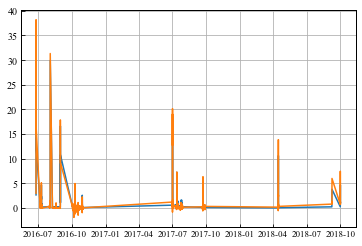

####################
2016-06-25 02:00:00 to 2016-7-01 06:00:00


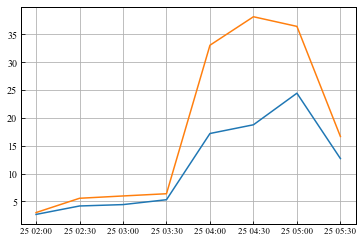

####################
2017-07-11 02:00:00 to 2017-7-15 06:00:00


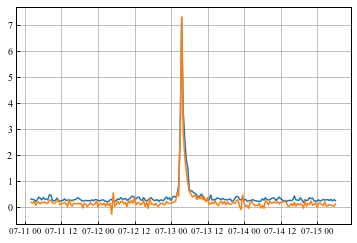

####################
2018-09-8 00:00:00 to 2018-9-9 06:00:00


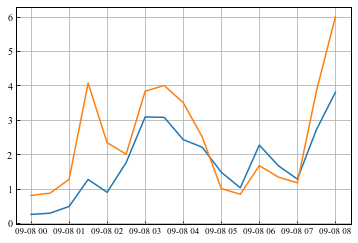

####################
2016-06-25 02:00:00
2018-10-01 06:00:00


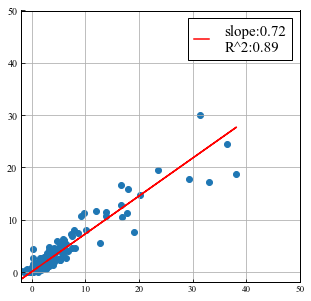

####################
compare_with_furui_result
####################
9/21
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2017-11-23  16.976358  26.947102  35.565747  13.21262  3.471179   3.344667   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2017-11-23      0.482328         0.0  
I set the initial alpha rate as 42.0 here, because you set the alpha when optimizing


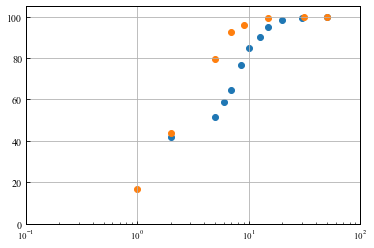

I set the initial alpha rate as 42.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.42 when optimizing


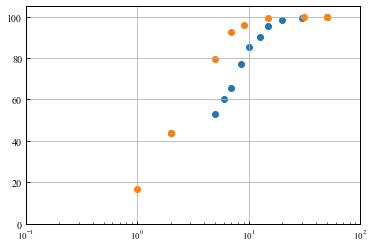

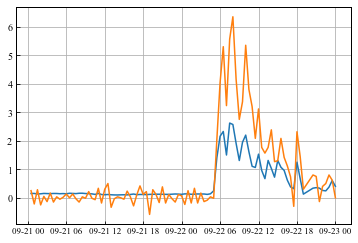

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-04-28  25.521193  18.079525  16.533204  8.463344  5.156703  11.583598   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-04-28      8.442634    6.219798  
I set the initial alpha rate as 42.0 here, because you set the alpha when optimizing


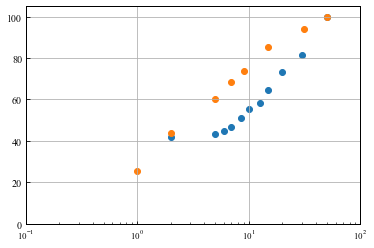

I set the initial alpha rate as 42.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.42 when optimizing


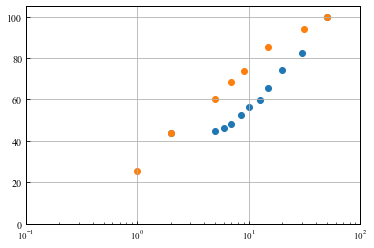

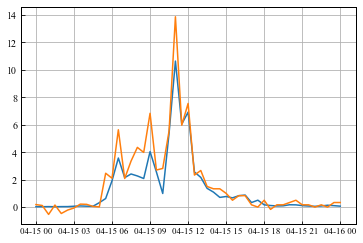

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-07-16  31.119403  15.062189  12.114428  6.965174  5.186567  15.422886   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-07-16      8.432836    5.696517  
I set the initial alpha rate as 42.0 here, because you set the alpha when optimizing


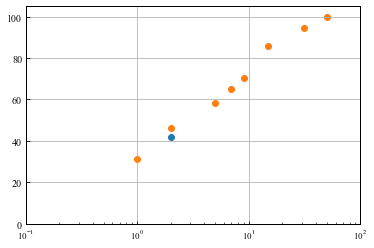

I set the initial alpha rate as 42.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.42 when optimizing


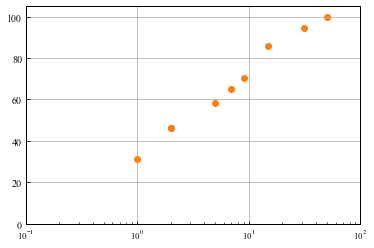

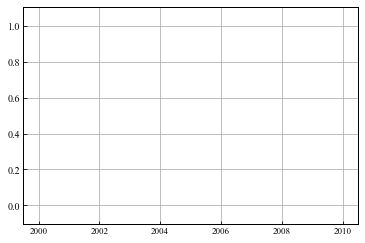

In [22]:
calcdischarge.disp_results_method2(df_all, W_IDEAL, Correction_factor_10ch.x, alpha=alpha)

Bedload Discharge ##########
TIMESTAMP
2018-04-15 00:00:00    0.030220
2018-04-15 00:30:00    0.027893
2018-04-15 01:00:00    0.035857
2018-04-15 01:30:00    0.026953
2018-04-15 02:00:00    0.035217
                         ...   
2018-10-01 04:00:00    4.676235
2018-10-01 04:30:00    2.471144
2018-10-01 05:00:00    1.188496
2018-10-01 05:30:00    0.977591
2018-10-01 06:00:00    1.113163
Length: 85, dtype: float64
####################
Whole period


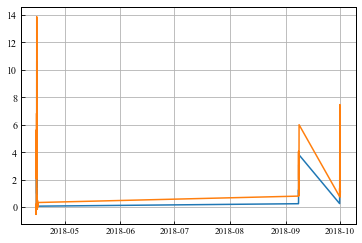

####################
2016-06-25 02:00:00 to 2016-7-01 06:00:00


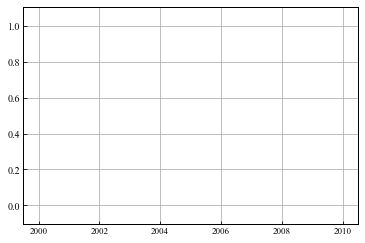

####################
2017-07-11 02:00:00 to 2017-7-15 06:00:00


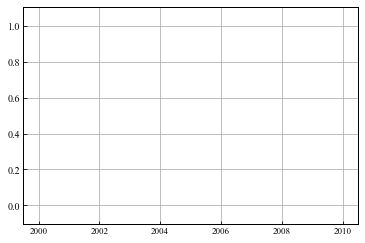

####################
2018-09-8 00:00:00 to 2018-9-9 06:00:00


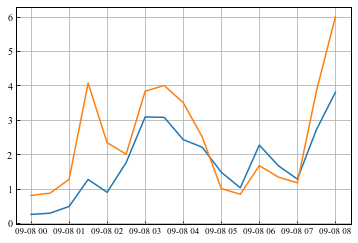

####################
2018-04-15 00:00:00
2018-10-01 06:00:00


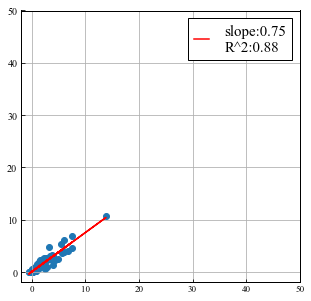

####################
compare_with_furui_result
####################
9/21
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2017-11-23  16.976358  26.947102  35.565747  13.21262  3.471179   3.344667   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2017-11-23      0.482328         0.0  
I set the initial alpha rate as 42.0 here, because you set the alpha when optimizing


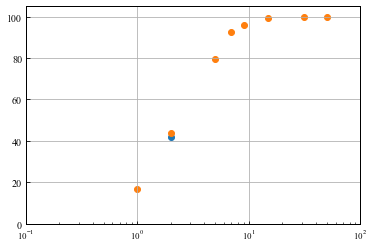

I set the initial alpha rate as 42.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.42 when optimizing


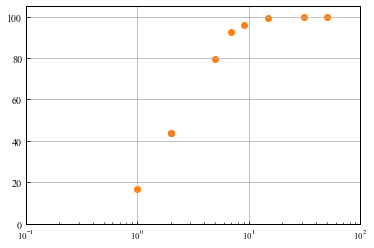

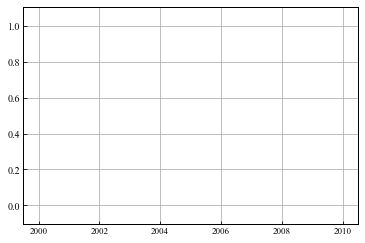

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-04-28  25.521193  18.079525  16.533204  8.463344  5.156703  11.583598   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-04-28      8.442634    6.219798  
I set the initial alpha rate as 42.0 here, because you set the alpha when optimizing


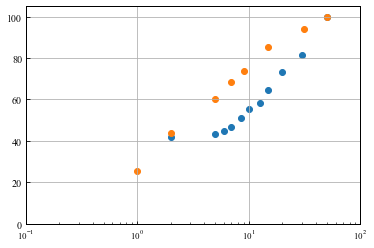

I set the initial alpha rate as 42.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.42 when optimizing


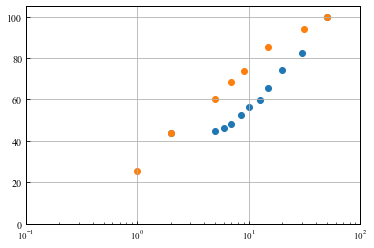

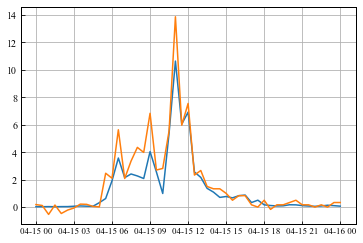

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-07-16  31.119403  15.062189  12.114428  6.965174  5.186567  15.422886   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-07-16      8.432836    5.696517  
I set the initial alpha rate as 42.0 here, because you set the alpha when optimizing


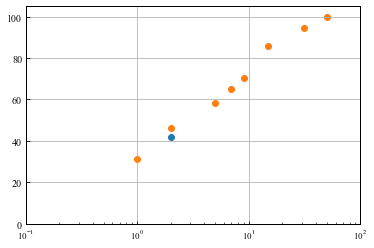

I set the initial alpha rate as 42.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.42 when optimizing


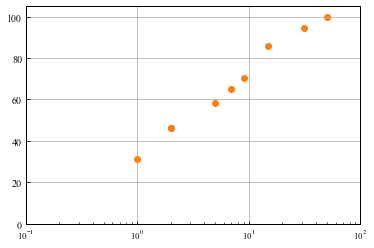

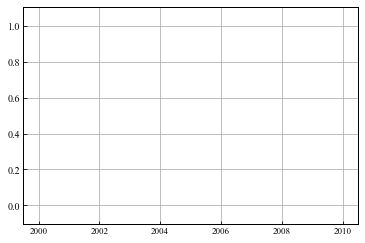

In [23]:
calcdischarge.disp_results_method2(df_2018, W_IDEAL, Correction_factor_10ch.x, alpha=alpha)

## ノイズが少ないチャンネル5~10のみを使う

In [24]:
from scipy.optimize import minimize

# 目的関数(Tot(５)以上)
names_of_center_over5 = names_of_center[4:]
print(names_of_center_over5)


alpha = 0.7
def func(Const):
    '''
    ここに最小化するコスト関数を設定する。
    コスト関数をreturnで返す
    '''
    cost = 0
    df_w = df_all_plus_during_events[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
#     df_w = df_all_plus[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
    df_w_corrected = df_w.mul(Const[:-1].reshape(1,6))
    df_w_corrected_sum = df_w_corrected.sum(axis=1)
    
    df_qcalc = df_w_corrected_sum * (1/((1-alpha)*(1-Const[-1])))
#     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
    cost = np.square(df_qcalc-df_all_plus['Load_Avg_difference'])
#     cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
#     cost = np.log(np.abs(np.log1p(df_qcalc)-np.log1p(df_all_plus['Load_Avg_difference'])))


    Cost = cost.sum()
    return Cost

def output_result_of_func():
    """
    Const[0]-Const[5] : beta1-beta6
    Const[6] : gamma
    Const[7] (if it exist) : alpha
    
    """
    error_less = 0.5
    error_more = 1.5
    
    cons = (
            {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
            {'type': 'ineq', 'fun': lambda Const: Const[5]-error_less},
            {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},

            {'type': 'ineq', 'fun': lambda Const:  Const[6]},
            {'type': 'ineq', 'fun': lambda Const:  1-Const[6]},
            
            {'type': 'ineq', 'fun': lambda Const: Const[1]*W_IDEAL[1] - Const[0]*W_IDEAL[0]},
            {'type': 'ineq', 'fun': lambda Const: Const[2]*W_IDEAL[2] - Const[1]*W_IDEAL[1]},
            {'type': 'ineq', 'fun': lambda Const: Const[3]*W_IDEAL[3] - Const[2]*W_IDEAL[2]},
            {'type': 'ineq', 'fun': lambda Const: Const[4]*W_IDEAL[4] - Const[3]*W_IDEAL[3]},
            {'type': 'ineq', 'fun': lambda Const: Const[5]*W_IDEAL[5] - Const[4]*W_IDEAL[4]},
             
             )
    temp = 1000000000 
    W_ans = []
    results = []
    
    for i in range(100):
        Const0 = np.append(np.random.rand(6), 2)# 初期値は適当
        result = minimize(func, x0=Const0, constraints=cons, method="COBYLA")
        if result.fun < temp:
            results.append(result)
            temp = result.fun
            print('func : ', temp)
            print('x : ', result.x)
    
    return results[-1]

Correction_factor_tot5to10 = output_result_of_func()

['hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


func :  860.3665738076606
x :  [0.85177647 0.95163977 0.72193362 0.60610947 0.5        0.5
 0.50674909]
func :  859.7688766094814
x :  [0.86533523 0.98029406 0.74367136 0.63202603 0.5        0.50388115
 0.49765293]
func :  855.8820902902542
x :  [0.68014542 1.15313706 0.87479363 0.54666019 0.5        0.50630466
 0.49653595]
func :  854.4009432218861
x :  [0.62300864 1.22252946 0.92743614 0.50357934 0.5        0.51568164
 0.49359167]
func :  853.6645685967369
x :  [0.74582821 1.29425623 0.98184955 0.65074774 0.5        0.57454392
 0.4399313 ]
func :  852.8144470390374
x :  [0.66690735 1.34331579 1.01906715 0.68308865 0.5        0.56611941
 0.43643751]


Bedload Discharge ##########
TIMESTAMP
2016-06-25 02:00:00     2.815492
2016-06-25 02:30:00     5.271225
2016-06-25 03:00:00     6.177604
2016-06-25 03:30:00     7.153655
2016-06-25 04:00:00    23.007528
                         ...    
2018-10-01 04:00:00     6.677260
2018-10-01 04:30:00     3.355160
2018-10-01 05:00:00     1.487740
2018-10-01 05:30:00     1.257249
2018-10-01 06:00:00     1.454058
Length: 4259, dtype: float64
####################
Whole period


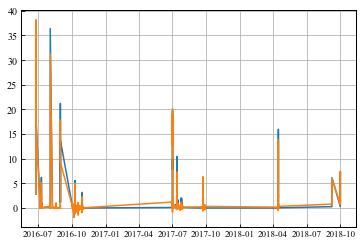

####################
2016-06-25 02:00:00 to 2016-7-01 06:00:00


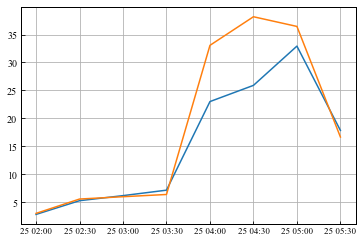

####################
2017-07-11 02:00:00 to 2017-7-15 06:00:00


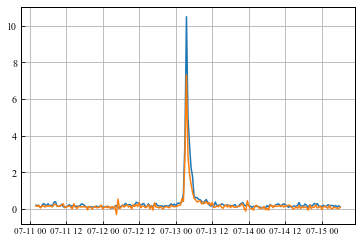

####################
2018-09-8 00:00:00 to 2018-9-9 06:00:00


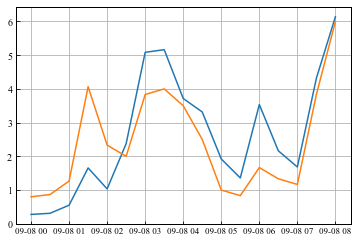

####################
2016-06-25 02:00:00
2018-10-01 06:00:00


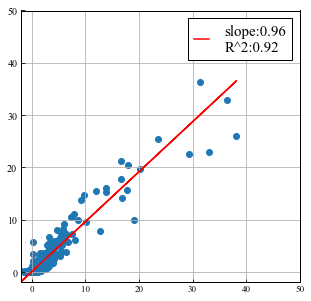

####################
compare_with_furui_result
####################
9/21
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2017-11-23  16.976358  26.947102  35.565747  13.21262  3.471179   3.344667   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2017-11-23      0.482328         0.0  
I set the initial alpha rate as 70.0 here, because you set the alpha when optimizing


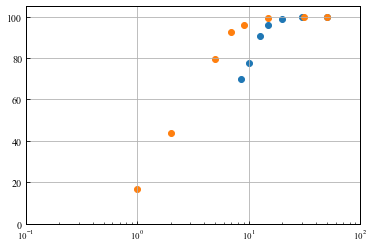

I set the initial alpha rate as 70.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.7 when optimizing


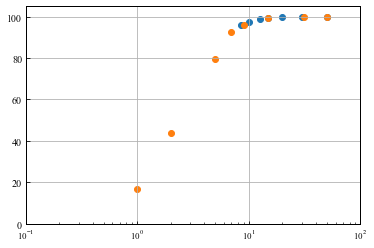

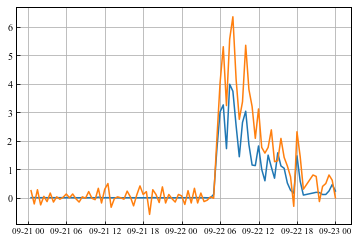

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-04-28  25.521193  18.079525  16.533204  8.463344  5.156703  11.583598   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-04-28      8.442634    6.219798  
I set the initial alpha rate as 70.0 here, because you set the alpha when optimizing


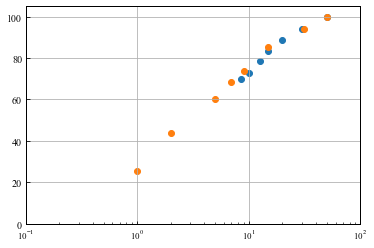

I set the initial alpha rate as 70.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.7 when optimizing


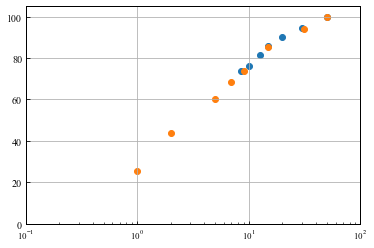

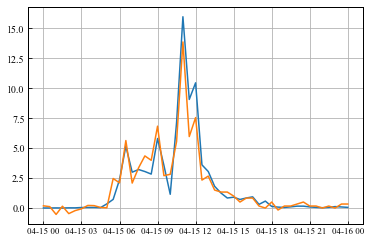

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-07-16  31.119403  15.062189  12.114428  6.965174  5.186567  15.422886   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-07-16      8.432836    5.696517  
I set the initial alpha rate as 70.0 here, because you set the alpha when optimizing


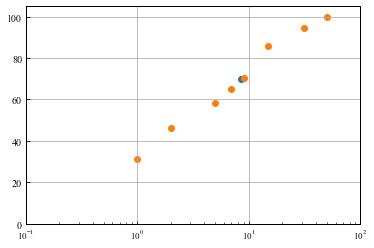

I set the initial alpha rate as 70.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.7 when optimizing


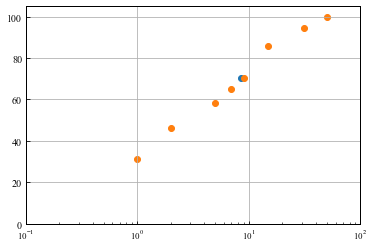

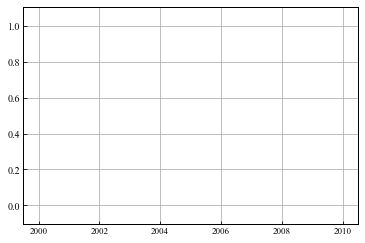

In [25]:
calcdischarge.disp_results_method2(df_all, W_IDEAL[4:], Correction_factor_tot5to10.x, alpha=alpha)

In [26]:
# calcdischarge.disp_results_method2(df_2018, W_IDEAL[4:], Correction_factor_tot5to10.x, alpha=alpha)

In [27]:
gamma = 0

if gamma == 0:
    gamma = 0.0

    from scipy.optimize import minimize

    # 目的関数(Tot(５)以上)
    names_of_center_over5 = names_of_center[4:]
    print(names_of_center_over5)

    alpha = 0.7
    def func(Const):
        '''
        ここに最小化するコスト関数を設定する。
        コスト関数をreturnで返す
        '''
        cost = 0
#         df_w = df_all_plus_during_events[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
        df_w = df_all_plus[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
        df_w_corrected = df_w.mul(Const.reshape(1,6))
        df_w_corrected_sum = df_w_corrected.sum(axis=1)

        df_qcalc = df_w_corrected_sum * (1/((1-alpha)*(1-gamma)))
    #     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
#         cost = np.square(df_qcalc-df_all_plus['Load_Avg_difference'])
        cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
    #     cost = np.log(np.abs(np.log1p(df_qcalc)-np.log1p(df_all_plus['Load_Avg_difference'])))


        Cost = cost.sum()
        return Cost

    def output_result_of_func():
        """
        Const[0]-Const[5] : beta1-beta6
        Const[6] : gamma
        Const[7] (if it exist) : alpha

        """
        error_less = 0.5
        error_more =1.5
        cons = (
                {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
                {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
                {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
                {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
                {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
                {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
                {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
                {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
                {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
                {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
                {'type': 'ineq', 'fun': lambda Const: Const[5]-error_less},
                {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},


                {'type': 'ineq', 'fun': lambda Const: Const[1]*W_IDEAL[1] - Const[0]*W_IDEAL[0]},
                {'type': 'ineq', 'fun': lambda Const: Const[2]*W_IDEAL[2] - Const[1]*W_IDEAL[1]},
                {'type': 'ineq', 'fun': lambda Const: Const[3]*W_IDEAL[3] - Const[2]*W_IDEAL[2]},
                {'type': 'ineq', 'fun': lambda Const: Const[4]*W_IDEAL[4] - Const[3]*W_IDEAL[3]},
                {'type': 'ineq', 'fun': lambda Const: Const[5]*W_IDEAL[5] - Const[4]*W_IDEAL[4]},

                 )
        temp = 1000000000 
        W_ans = []
        results = []

        for i in range(100):
            Const0 = np.append(np.random.rand(5), 2)# 初期値は適当
            result = minimize(func, x0=Const0, constraints=cons, method="COBYLA")
            if result.fun < temp:
                results.append(result)
                temp = result.fun
                print('func : ', temp)
                print('x : ', result.x)

        return results[-1]

    Correction_factor_tot5to10_alpha_gamma = output_result_of_func()

['hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)']
func :  974.8366482704564
x :  [1.49978469 1.49627345 1.4974352  0.753672   0.58884207 1.04409042]
func :  974.5355908814322
x :  [1.49997967 1.5        1.19434396 0.98599757 0.78118774 0.76786233]
func :  974.4650891460619
x :  [1.49519983 1.49361351 1.48066435 0.92513924 0.66081374 0.76248854]
func :  974.462561030984
x :  [1.4999586  1.49875588 1.49951685 0.8762745  0.6477617  0.81451233]


Bedload Discharge ##########
TIMESTAMP
2016-06-25 02:00:00     2.341942
2016-06-25 02:30:00     4.291596
2016-06-25 03:00:00     4.934061
2016-06-25 03:30:00     5.791903
2016-06-25 04:00:00    18.062893
                         ...    
2018-10-01 04:00:00     5.371130
2018-10-01 04:30:00     2.724680
2018-10-01 05:00:00     1.216515
2018-10-01 05:30:00     1.038756
2018-10-01 06:00:00     1.198409
Length: 4259, dtype: float64
####################
Whole period


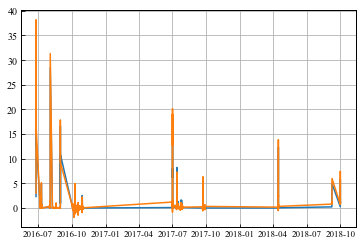

####################
2016-06-25 02:00:00 to 2016-7-01 06:00:00


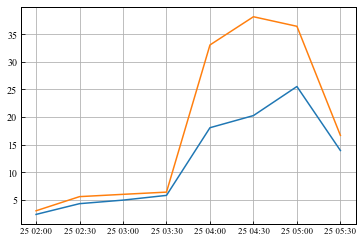

####################
2017-07-11 02:00:00 to 2017-7-15 06:00:00


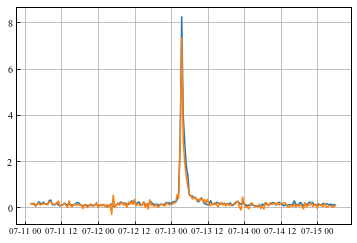

####################
2018-09-8 00:00:00 to 2018-9-9 06:00:00


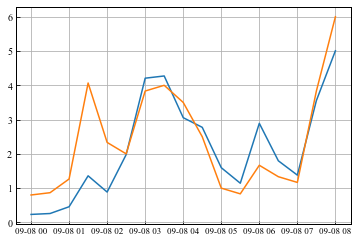

####################
2016-06-25 02:00:00
2018-10-01 06:00:00


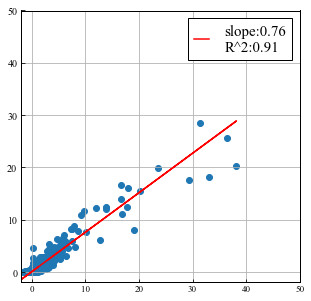

####################
compare_with_furui_result
####################
9/21
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2017-11-23  16.976358  26.947102  35.565747  13.21262  3.471179   3.344667   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2017-11-23      0.482328         0.0  
I set the initial alpha rate as 70.0 here, because you set the alpha when optimizing


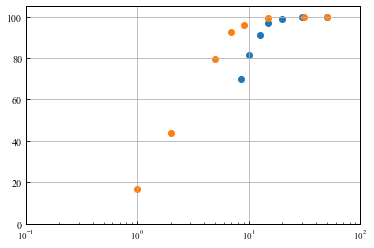

I set the initial alpha rate as 70.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.7 when optimizing


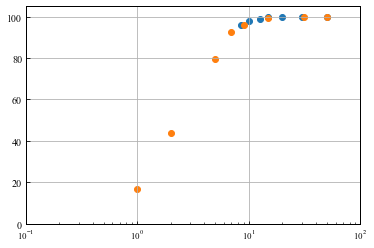

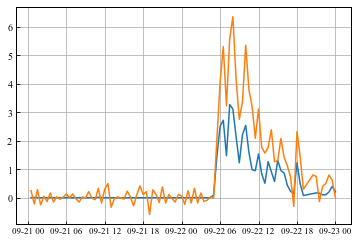

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-04-28  25.521193  18.079525  16.533204  8.463344  5.156703  11.583598   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-04-28      8.442634    6.219798  
I set the initial alpha rate as 70.0 here, because you set the alpha when optimizing


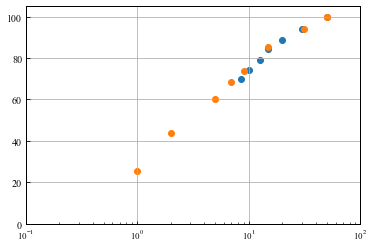

I set the initial alpha rate as 70.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.7 when optimizing


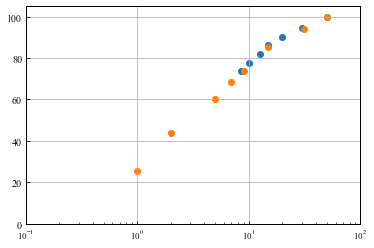

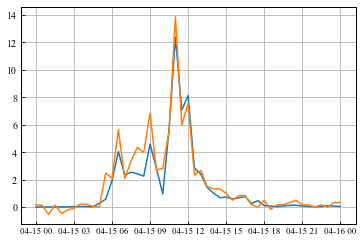

####################
4/15
furui :               -1mm(%)   1-2mm(%)   2-5mm(%)  5-7mm(%)  7-9mm(%)  9-15mm(%)  \
TIMESTAMP                                                                    
2018-07-16  31.119403  15.062189  12.114428  6.965174  5.186567  15.422886   

            19-31.5mm(%)  31.5mm-(%)  
TIMESTAMP                             
2018-07-16      8.432836    5.696517  
I set the initial alpha rate as 70.0 here, because you set the alpha when optimizing


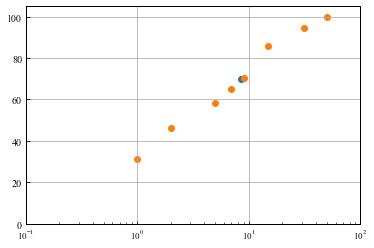

I set the initial alpha rate as 70.0 here so that you can see how accurate the sediment distribution given by method2 even though I set the alpha as 0.7 when optimizing


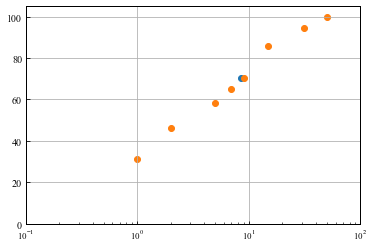

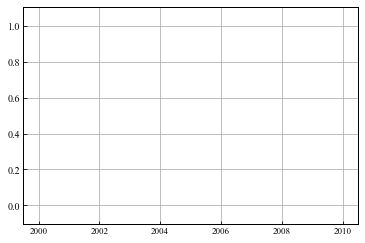

In [28]:
Correction_factors = np.append(Correction_factor_tot5to10_alpha_gamma.x, gamma)
calcdischarge.disp_results_method2(df_all, W_IDEAL[4:], Correction_factors, alpha=alpha)

In [29]:
# gamma = 0
# STAMDARD_VALUE = True

# if gamma == 0:
    
#     if STAMDARD_VALUE:


#         from scipy.optimize import minimize

#         # 目的関数(Tot(５)以上)
#         names_of_center_over5 = names_of_center[4:]
#         names_of_standard = names_of_center_over5[-1]
#         names_of_mutable = names_of_center_over5[:-1]

#         alpha = 0.7
#         def func(Const):
#             '''
#             ここに最小化するコスト関数を設定する。
#             コスト関数をreturnで返す
#             '''
#             cost = 0
#     #         df_w = df_all_plus_during_events[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
#             df_w_mutable = df_all_plus[names_of_mutable].mul(W_IDEAL[4:-1].reshape(1,5))
#             df_w_standard = df_all_plus[names_of_standard].mul(W_IDEAL[-1])
        
            
#             df_w_mutable_corrected = df_w_mutable.mul(Const.reshape(1,5))
            
#             df_w_corrected_sum = df_w_mutable_corrected.sum(axis=1) + df_w_standard

#             df_qcalc = df_w_corrected_sum * (1/((1-alpha)*(1-gamma)))
#         #     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
#     #         cost = np.square(df_qcalc-df_all_plus['Load_Avg_difference'])
#             cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
#         #     cost = np.log(np.abs(np.log1p(df_qcalc)-np.log1p(df_all_plus['Load_Avg_difference'])))


#             Cost = cost.sum()
#             return Cost

#         def output_result_of_func():
#             """
#             Const[0]-Const[5] : beta1-beta6
#             Const[6] : gamma
#             Const[7] (if it exist) : alpha

#             """
#             error_less = 0.3
#             error_more =3.0
#             cons = (
#                     {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
#                     {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
#                     {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
#                     {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
#                     {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
#                     {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
#                     {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
#                     {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
#                     {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
#                     {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
#     #                 {'type': 'ineq', 'fun': lambda Const: Const[5]-error_less},
#     #                 {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},


#                     {'type': 'ineq', 'fun': lambda Const: Const[0] - Const[1]},
#                     {'type': 'ineq', 'fun': lambda Const: Const[1] - Const[2]},
#                     {'type': 'ineq', 'fun': lambda Const: Const[2] - Const[3]},
#                     {'type': 'ineq', 'fun': lambda Const: Const[3] - Const[4]},
#                     {'type': 'ineq', 'fun': lambda Const: Const[4] },


#                      )
#             temp = 1000000000 
#             W_ans = []
#             results = []

#             for i in range(100):
#                 Const0 = np.append(np.random.rand(4), 2)# 初期値は適当
#                 result = minimize(func, x0=Const0, constraints=cons, method="COBYLA")
#                 if result.fun < temp:
#                     results.append(result)
#                     temp = result.fun
#                     print('func : ', temp)
#                     print('x : ', result.x)

#             return results[-1]

#         Correction_factor_tot5to10 = output_result_of_func()

In [30]:
# Correction_factors = np.append(Correction_factor_tot5to10.x, [0,gamma])
# print(Correction_factors)
# calcdischarge.disp_results_method2(df_all, W_IDEAL[4:], Correction_factors, alpha=alpha)

In [31]:
# calcdischarge.disp_results_method2(df_all, W_IDEAL[4:], Correction_factor_tot5to10.x.append(gamma), alpha=alpha)

In [32]:
USE_YEAR = '2017_2018'
# USE_YEAR = '2017'
# USE_YEAR = '2018'

In [33]:
cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference']
print('COL_USE :' +  str(cols_use))

if USE_YEAR == '2017_2018':

    print('COL_USE :' +  str(cols_use))
    
    df_method1 = pd.DataFrame()

    df2017 = getdfs.get2017cleanedmean_pit_true()
    df2017 = df2017[cols_use]
    df_method1 = df_method1.append(df2017)
    del df2017

    list_df2018_3events = getdfs.get2018_3events_mean()

    for i, df2018_each in enumerate(list_df2018_3events):
        df_method1 = df_method1.append(df2018_each[cols_use])

    del list_df2018_3events
    
elif USE_YEAR == '2017':
    df2017 = getdfs.get2017cleanedmean_pit_true()
    df2017 = df2017[cols_use]

    df_method1 = pd.DataFrame()
    df_method1 = df_method1.append(df2017)
    del df2017
    
elif USE_YEAR == '2018':
    df_method1 = pd.DataFrame()
    list_df2018_3events = getdfs.get2018_3events_mean()

    for i, df2018_each in enumerate(list_df2018_3events):
        df_method1 =df_method1.append(df2018_each)

    del list_df2018_3events

COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference']
COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference']


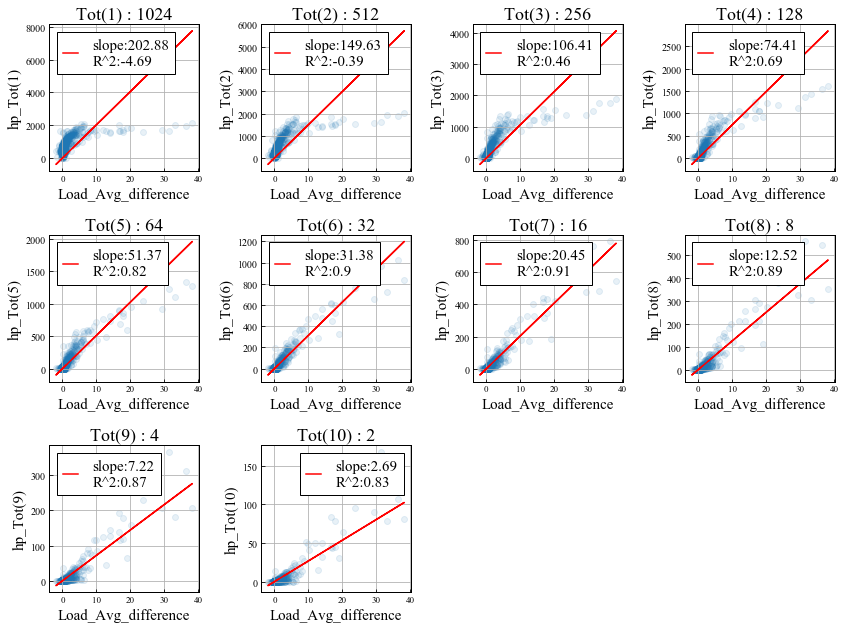

In [34]:
dispgraphs.scatter_graphs(df_method1, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.1, linear_regression=True)

# del df_method1

# 芦田道上式・MPM式との比較

https://sites.google.com/view/senmitsu/%E6%B0%B4%E5%B7%A5%E7%B3%BB/5-2-%E5%9C%9F%E7%A0%82%E3%81%AE%E6%B5%81%E9%80%81%E6%8E%83%E6%B5%81%E7%A0%82

http://www.nilim.go.jp/lab/bcg/siryou/tnn/tnn0069pdf/ks006907.pdf
まず流砂量を算出する。
qcalc は全体の流砂量、qcalc_eachは、粒径別流砂量

In [35]:
cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference','WaterLevel(cm)']

print('COL_USE :' +  str(cols_use))
    
df2017 = getdfs.get2017method2cleanedmean()
df2017 = df2017[cols_use]
    
df2018 = getdfs.get2018method2cleanedmean()
    
df_all = pd.DataFrame()
df_all = df_all.append(df2017)
df_all = df_all.append(df2018)

del df2017, df2018

COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference', 'WaterLevel(cm)']
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [36]:
qcalc, qcalc_each = calcdischarge.calc_q(df_all, W_IDEAL[4:], list_beta=Correction_factor_tot5to10.x[:-1], alpha=alpha, gamma=Correction_factor_tot5to10.x[-1], start=None, end=None)

In [37]:
qcalc = pd.DataFrame(qcalc)
qcalc.columns = ['qcalc']

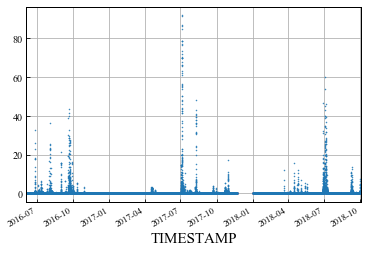

In [38]:
dispgraphs.time_series_graph(qcalc, col_name='qcalc')

In [39]:
quantity_of_flow = df_all['WaterLevel(cm)']

(-2, 30)

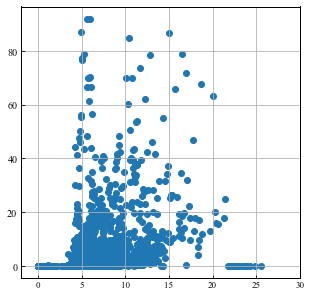

In [40]:
plt.figure(figsize=(5,5))
plt.scatter(quantity_of_flow, qcalc)
plt.xlim(-2,30)

季節ごと(月ごと)に分ける

In [41]:
def extract_by_month(df, month):
    return df[df.index.month == month]

def extract_by_year(df, year):
    return df[df.index.year == year]

list_monthly_qcalc = []
list_monthly_waterlevel = []
for i in range(12):
    list_monthly_qcalc.append(extract_by_month(qcalc, i+1))
    list_monthly_waterlevel.append(pd.DataFrame(extract_by_month(df_all, i+1)['WaterLevel(cm)']))

月ごとに見るとどうなるか？基本的に7月に流砂量が多い。イベントによって傾きはバラバラ。

<Figure size 360x360 with 0 Axes>

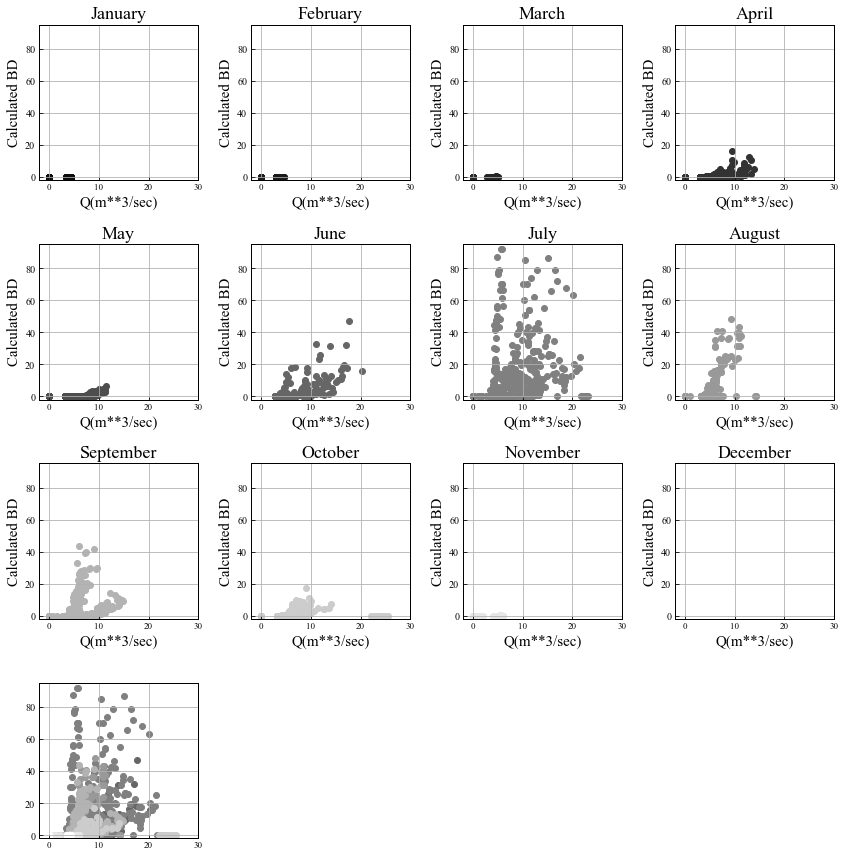

In [42]:
plt.figure(figsize=(5,5))
colorlist = ["0.05", "0.1", "0.15", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
months = ["January", "February", "March",  "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 12))
axis = []

for i in range(12):
    ax = plt.subplot(4,4,i+1)
    ax.scatter(list_monthly_waterlevel[i], list_monthly_qcalc[i], c=colorlist[i])
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

    ax.set_title(months[i])
    ax.set_ylabel('Calculated BD')
    ax.set_xlabel('Q(m**3/sec)')
    
    axis.append(ax)
    
    plt.tight_layout()


ax = plt.subplot(4,4,13)
for monthly_qcalc, monthly_waterlevel, color in zip(list_monthly_qcalc, list_monthly_waterlevel, colorlist):
    ax.scatter(monthly_waterlevel, monthly_qcalc, color=color)
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

axis.append(ax)



月ごとで見るとどうなるか。色が薄い→濃いで時系列を表現している。ひとまず2017年だけで見る(2018年も混ぜると1か月内の動きが見にくくなるから)
モジュールを作ったから()の中に見たいTotを入力すれば切り替えて見れる

In [43]:
qcalc_each.head()

,hp_Tot(5),hp_Tot(6),hp_Tot(7),hp_Tot(8),hp_Tot(9),hp_Tot(10)
TIMESTAMP,,,,,,
2016-06-03 00:00:00,0.000399,0.00000,0.0,0.0,0.0,0.0
2016-06-03 00:30:00,0.000000,0.00000,0.0,0.0,0.0,0.0
2016-06-03 01:00:00,0.001197,0.00173,0.0,0.0,0.0,0.0
2016-06-03 01:30:00,0.000798,0.00000,0.0,0.0,0.0,0.0
2016-06-03 02:00:00,0.001197,0.00000,0.0,0.0,0.0,0.0


In [44]:
list_monthly_qcalc = []
list_monthly_waterlevel = []
for i in range(12):
    list_monthly_qcalc.append(extract_by_month(qcalc, i+1))
    list_monthly_waterlevel.append(pd.DataFrame(extract_by_month(df_all, i+1)['WaterLevel(cm)']))

<Figure size 360x360 with 0 Axes>

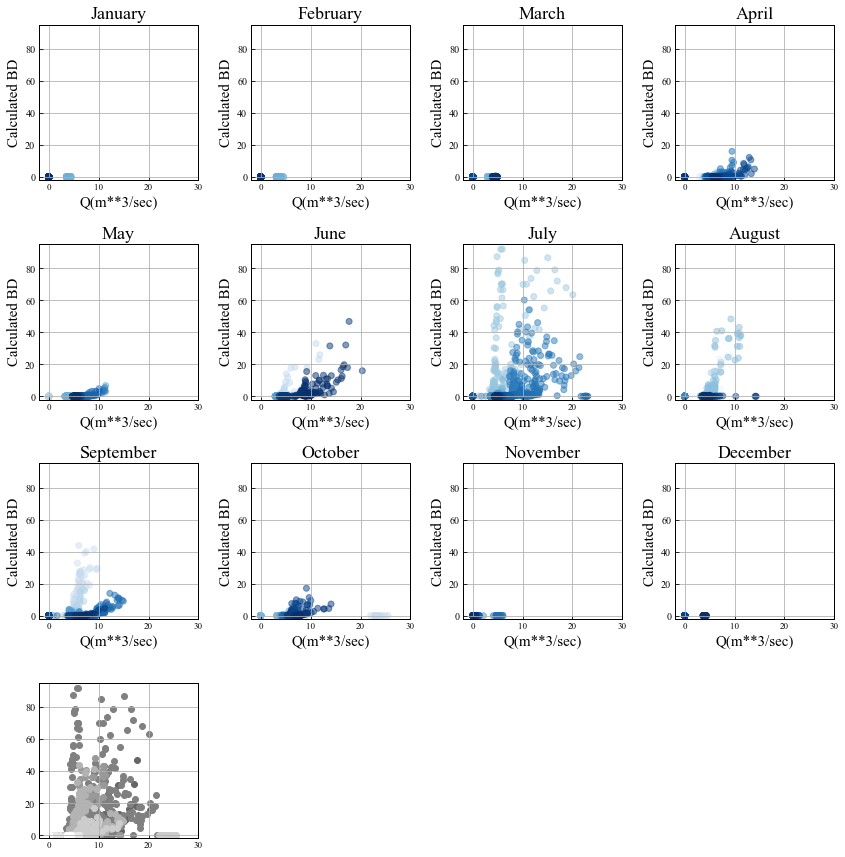

In [45]:
plt.figure(figsize=(5,5))
colorlist = ["0.05", "0.1", "0.15", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
months = ["January", "February", "March",  "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 12))
axis = []


for i in range(12):
    ax = plt.subplot(4,4,i+1)

    temp_num = np.array(list(range(len(list_monthly_waterlevel[i]))))
#     temp_num = np.random.rand(len(list_monthly_waterlevel[i]))
    ax.scatter(np.array(list_monthly_waterlevel[i]).flatten(), np.array(list_monthly_qcalc[i]).flatten(), c=temp_num, cmap='Blues', alpha=0.5)
    
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

    ax.set_title(months[i])
    ax.set_ylabel('Calculated BD')
    ax.set_xlabel('Q(m**3/sec)')
    
    axis.append(ax)
    
    plt.tight_layout()


ax = plt.subplot(4,4,13)
for monthly_qcalc, monthly_waterlevel, color in zip(list_monthly_qcalc, list_monthly_waterlevel, colorlist):
    ax.scatter(monthly_waterlevel, monthly_qcalc, color=color)
    ax.set_xlim(-2,30)
    ax.set_ylim(-2,95)

axis.append(ax)



では、粒径毎のふるまいはどうなるか？下のように今回はチャンネル５～１０を使用していて、それぞれが対象粒径を持っている(と仮定している)

In [46]:
qcalc_each.head()

,hp_Tot(5),hp_Tot(6),hp_Tot(7),hp_Tot(8),hp_Tot(9),hp_Tot(10)
TIMESTAMP,,,,,,
2016-06-03 00:00:00,0.000399,0.00000,0.0,0.0,0.0,0.0
2016-06-03 00:30:00,0.000000,0.00000,0.0,0.0,0.0,0.0
2016-06-03 01:00:00,0.001197,0.00173,0.0,0.0,0.0,0.0
2016-06-03 01:30:00,0.000798,0.00000,0.0,0.0,0.0,0.0
2016-06-03 02:00:00,0.001197,0.00000,0.0,0.0,0.0,0.0


下のコードのhp_Tot()の中の数字を5~10に変化させると分かるが、tot(5)のときは、相関が比較的良いが、Tot(10)のときは相関が悪く分散している。つまり、粒径が小さい流砂に関しては、ある程度水理量に相関があるが、粒径が大きな流砂は水理量との相関が悪いことが分かる

<Figure size 360x360 with 0 Axes>

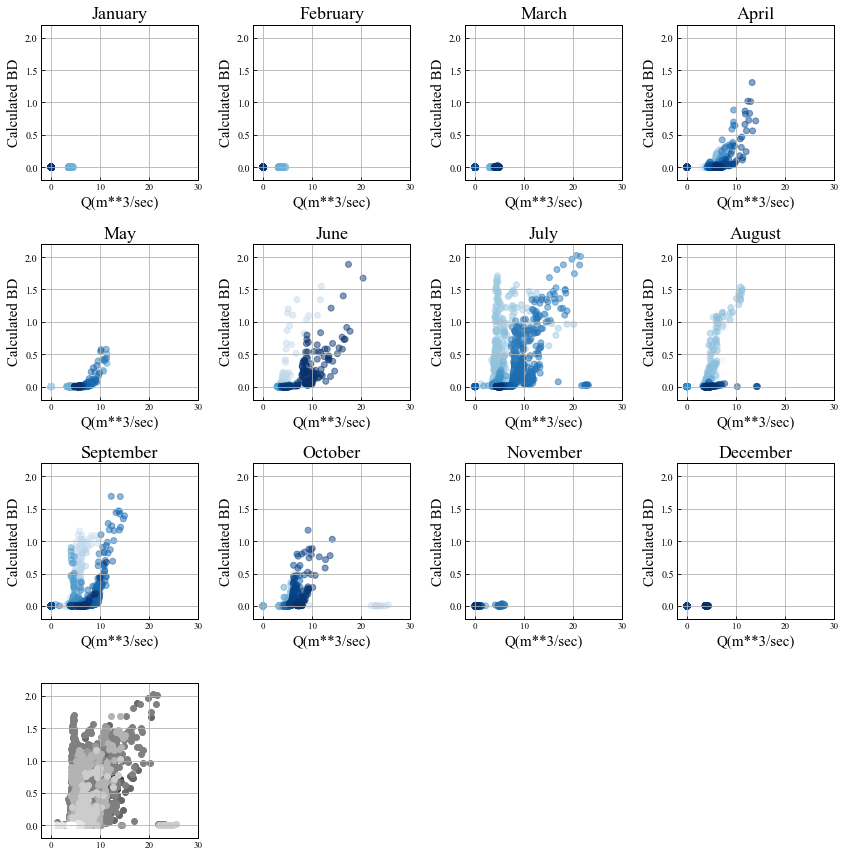

In [47]:
dispgraphs.disp_qcaleach_monthly(qcalc_each, df_all['WaterLevel(cm)'], tot_name='hp_Tot(5)')

In [48]:
list_of2017_8events = getdfs.get2017_8events_method2_mean()

I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [49]:
list_qcalc_2017 = []
list_qcalc_each_2017 = []
list_waterlevel_2017 = []
for i in range(len(list_of2017_8events)):
    qcalc, qcalc_each = calcdischarge.calc_q(list_of2017_8events[i], W_IDEAL[4:], list_beta=Correction_factor_tot5to10.x[:-1], alpha=alpha, gamma=Correction_factor_tot5to10.x[-1], start=None, end=None)
    waterlevel = list_of2017_8events[i]['WaterLevel(cm)']
    list_qcalc_2017.append(qcalc)
    list_qcalc_each_2017.append(qcalc_each)    
    list_waterlevel_2017.append(waterlevel)
    


Text(0.5, 0, 'Q(m**3/sec)')

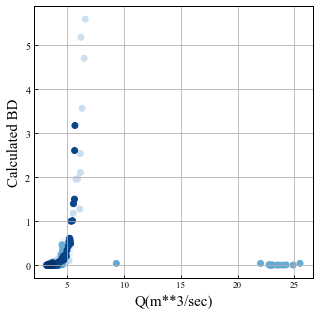

In [50]:
num_of_event2018 = 4#0~8

plt.figure(figsize=(5,5))
colorlist = ["0.05", "0.1", "0.15", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1.0"]
axis = []

qcalc_2017 = list_qcalc_2017[num_of_event2018]
qcalc_each_2017 =list_qcalc_each_2017[num_of_event2018]
waterlevel_2017 = list_waterlevel_2017[num_of_event2018]

ax = plt.subplot(1,1,1)

temp_num = np.array(list(range(len(waterlevel_2017))))
ax.scatter(np.array(waterlevel_2017).flatten(), np.array(qcalc_2017).flatten(), c=temp_num, cmap='Blues', alpha=1)
    
# ax.set_xlim(-2,30)
# ax.set_ylim(-2,95)

ax.set_ylabel('Calculated BD')
ax.set_xlabel('Q(m**3/sec)')

# ax = plt.subplot(4,4,13)
# for monthly_qcalc, monthly_waterlevel, color in zip(list_monthly_qcalc, list_monthly_waterlevel, colorlist):
#     ax.scatter(monthly_waterlevel, monthly_qcalc, color=color)
#     ax.set_xlim(-2,30)
#     ax.set_ylim(-2,95)

# axis.append(ax)



In [51]:
list_qcalc_2017

[TIMESTAMP
 2016-06-25 02:00:00     2.815492
 2016-06-25 02:30:00     5.271225
 2016-06-25 03:00:00     6.177604
 2016-06-25 03:30:00     7.153655
 2016-06-25 04:00:00    23.007528
 2016-06-25 04:30:00    25.903850
 2016-06-25 05:00:00    32.927477
 2016-06-25 05:30:00    17.844882
 dtype: float64, TIMESTAMP
 2016-07-05 20:00:00    1.437553
 2016-07-05 20:30:00    2.225385
 2016-07-05 21:00:00    0.945921
 2016-07-05 21:30:00    0.424876
 2016-07-05 22:00:00    0.463531
                          ...   
 2016-07-12 03:00:00    0.190610
 2016-07-12 03:30:00    0.165597
 2016-07-12 04:00:00    0.113809
 2016-07-12 04:30:00    0.076520
 2016-07-12 05:30:00    0.099343
 Length: 307, dtype: float64, TIMESTAMP
 2016-07-31 01:30:00     0.243267
 2016-07-31 02:00:00     0.197681
 2016-07-31 02:30:00     0.122023
 2016-07-31 03:00:00     0.091054
 2016-07-31 03:30:00     0.116166
                          ...    
 2016-08-02 15:30:00     1.440293
 2016-08-02 16:00:00    22.542675
 2016-08-02 16:

In [52]:
# dispgraphs.time_series_graph(qcalc, col_name='qcalc')

In [53]:
real_W = []
for i in range(10):
    real_W.append(W_IDEAL[i]*Correction_factor_10ch.x[i])
print(real_W)

[7.628467086792908e-05, 0.00011255041907239111, 0.0001645652459330129, 0.000627332910935133, 0.0007141179525595562, 0.0010738695517159742, 0.0030289998483640328, 0.006225458033619519, 0.006374687351500259, 0.03937940534450066]


In [54]:
df_qcalc_10ch = df_all_plus[names_of_center].mul(np.array(real_W).reshape(1,10)).sum(axis=1)* (1/((1-alpha)*(1-Correction_factor_10ch.x[-1])))

In [55]:
print(df_qcalc_10ch)

TIMESTAMP
2016-06-25 02:00:00     5.156003
2016-06-25 02:30:00     8.085696
2016-06-25 03:00:00     8.567002
2016-06-25 03:30:00    10.262947
2016-06-25 04:00:00    33.264579
                         ...    
2018-10-01 04:00:00     9.040722
2018-10-01 04:30:00     4.777545
2018-10-01 05:00:00     2.297758
2018-10-01 05:30:00     1.890008
2018-10-01 06:00:00     2.152116
Length: 3405, dtype: float64


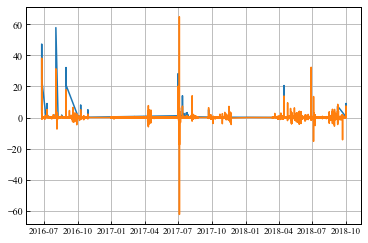

In [56]:
dispgraphs.compare_graphs_time_series(df_qcalc_10ch, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2018-10-01 06:00:00')

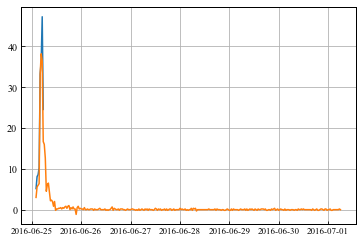

In [57]:
dispgraphs.compare_graphs_time_series(df_qcalc_10ch, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')

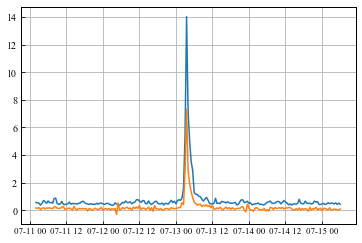

In [58]:
dispgraphs.compare_graphs_time_series(df_qcalc_10ch, df_all['Load_Avg_difference'], start='2017-07-11 02:00:00', end='2017-7-15 06:00:00')

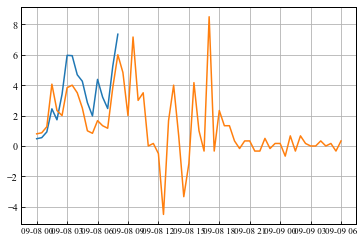

In [59]:
dispgraphs.compare_graphs_time_series(df_qcalc_10ch, df_all['Load_Avg_difference'], start='2018-09-8 00:00:00', end='2018-9-9 06:00:00')

2016-06-25 02:00:00
2018-10-01 06:00:00


(-2, 50)

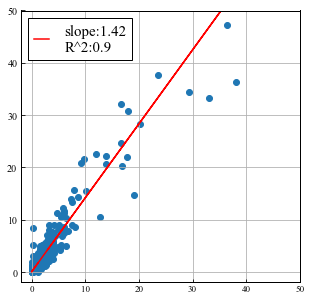

In [60]:
# dispgraphs.compare_graphs_scatter(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')
dispgraphs.compare_graphs_scatter(df_all_plus['Load_Avg_difference'], df_qcalc_10ch , linear_regression=True)
plt.xlim(-2, 50)
plt.ylim(-2, 50)

In [61]:
# from scipy.optimize import minimize

# # 目的関数(Tot(５)以上)
# names_of_center_over5 = names_of_center[4:]
# print(names_of_center_over5)

# def func(Const):
#     cost = 0
#     df_w = df_all_plus_during_events[names_of_center_over5].mul(W_IDEAL[4:].reshape(1,6))
#     df_w_corrected = df_w.mul(Const[:-1].reshape(1,6))
#     df_w_corrected_sum = df_w_corrected.sum(axis=1)
#     df_qcalc = df_w_corrected_sum * Const[-1]
# #     cost = np.abs(df_qcalc-df_all_plus['Load_Avg_difference'])
# #     cost = np.square(df_qcalc-df_all_plus['Load_Avg_difference'])
#     cost = np.sqrt(np.abs(df_qcalc-df_all_plus['Load_Avg_difference']))
# #     cost = np.log(np.abs(np.log1p(df_qcalc)-np.log1p(df_all_plus['Load_Avg_difference'])))


#     Cost = cost.sum()
#     return Cost

# def output_result_of_func():
#     error_less = 0.5
#     error_more = 2.0
#     cons = (
#             {'type': 'ineq', 'fun': lambda Const: Const[0]-error_less},
#             {'type': 'ineq', 'fun': lambda Const: -Const[0]+error_more},
#             {'type': 'ineq', 'fun': lambda Const: Const[1]-error_less},
#             {'type': 'ineq', 'fun': lambda Const: -Const[1]+error_more},
#             {'type': 'ineq', 'fun': lambda Const: Const[2]-error_less},
#             {'type': 'ineq', 'fun': lambda Const: -Const[2]+error_more},
#             {'type': 'ineq', 'fun': lambda Const: Const[3]-error_less},
#             {'type': 'ineq', 'fun': lambda Const: -Const[3]+error_more},
#             {'type': 'ineq', 'fun': lambda Const: Const[4]-error_less},
#             {'type': 'ineq', 'fun': lambda Const: -Const[4]+error_more},
#             {'type': 'ineq', 'fun': lambda Const: Const[5]-1},
#             {'type': 'ineq', 'fun': lambda Const: -Const[5]+error_more},

#             {'type': 'ineq', 'fun': lambda Const:  Const[6]-1.0}
        
        
        
#            )
#     temp = [] 
#     W_ans = []
#     results = []

#     Const0 = np.append(np.random.rand(6), 2)# 初期値は適当

#     result = minimize(func, x0=Const0, constraints=cons, method="COBYLA")
    
#     return result

# Correction_factor_tot5to10 = output_result_of_func()

In [62]:
Correction_factor_tot5to10

     fun: 852.8144470390374
   maxcv: -0.0
 message: 'Maximum number of function evaluations has been exceeded.'
    nfev: 1000
  status: 2
 success: False
       x: array([0.66690735, 1.34331579, 1.01906715, 0.68308865, 0.5       ,
       0.56611941, 0.43643751])

In [63]:
Correction_factor_tot5to10.x

array([0.66690735, 1.34331579, 1.01906715, 0.68308865, 0.5       ,
       0.56611941, 0.43643751])

In [64]:
real_W_over5 = []
for i in range(6):
    real_W_over5.append(W_IDEAL[4+i]*Correction_factor_tot5to10.x[i])
print(real_W_over5)

[0.0006068856870496264, 0.0026328989448240266, 0.0030673921204476965, 0.004720142595488058, 0.005405, 0.016983582301178288]


# Tot（５）以降のみ採用

Tot(４)以前は、飽和や、常時観測されているエラー値(流砂量が無い時でも常にパルスがカウントされている)の対処法がまだ定まっていないので、とりあえず飽和しないTot(5)以降のみを使用して解析を行った

In [65]:
#df_all reset
cols_use = names_of_center + ['Load_Avg', 'Load_Avg_difference','Velocity(m/s)', 'WaterLevel(cm)']

print('COL_USE :' +  str(cols_use))
    
df2017 = getdfs.get2017method2cleanedmean_pit_true()
df2017 = df2017[cols_use]
    
list_df2018_3events = getdfs.get2018_3events_method2_mean()
for i, df2018_each in enumerate(list_df2018_3events):
    list_df2018_3events[i] = df2018_each[cols_use]
    
df_all = pd.DataFrame()
df_all = df_all.append(df2017)
del df2017

for i, df2018_each in enumerate(list_df2018_3events):
    df_all = df_all.append(df2018_each)
        
del list_df2018_3events

df_all_plus = df_all[df_all['Load_Avg_difference'] >= 0]

COL_USE :['hp_Tot(1)', 'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)', 'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Load_Avg', 'Load_Avg_difference', 'Velocity(m/s)', 'WaterLevel(cm)']
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.
I used the 'vel_P_Tot' data as velocity. I'm not pretty sure if it's the surface vel or mean vel. You have to make sure what this vel means. You also have to know that from 2018 data, there's another velocity data called 'Velocity(m/s). You might wanna know what's the difference between these 2.


In [66]:
# df_qcalc_over5 = df_all_plus[names_of_center_over5].mul(np.array(real_W_over5).reshape(1,6)).sum(axis=1)* Correction_factor_tot5to10.x[-1]
df_qcalc_over5 = df_all_plus[names_of_center_over5].mul(np.array(real_W_over5).reshape(1,6)).sum(axis=1)* (1/((1-alpha)*(1-Correction_factor_tot5to10.x[-1])))

In [67]:
df_qcalc_over5

TIMESTAMP
2016-06-25 02:00:00     2.815492
2016-06-25 02:30:00     5.271225
2016-06-25 03:00:00     6.177604
2016-06-25 03:30:00     7.153655
2016-06-25 04:00:00    23.007528
                         ...    
2018-10-01 04:00:00     6.677260
2018-10-01 04:30:00     3.355160
2018-10-01 05:00:00     1.487740
2018-10-01 05:30:00     1.257249
2018-10-01 06:00:00     1.454058
Length: 3405, dtype: float64

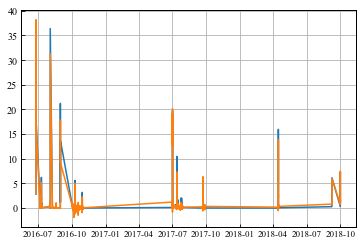

In [68]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2018-10-01 06:00:00')

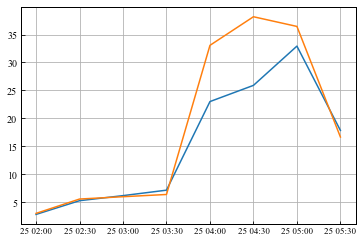

In [69]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')

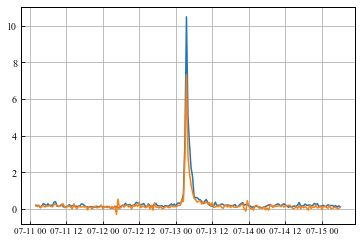

In [70]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2017-07-11 02:00:00', end='2017-7-15 06:00:00')

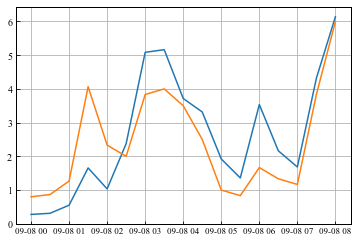

In [71]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start='2018-09-8 00:00:00', end='2018-9-9 06:00:00')

2016-06-25 02:00:00
2018-10-01 06:00:00


(-2, 50)

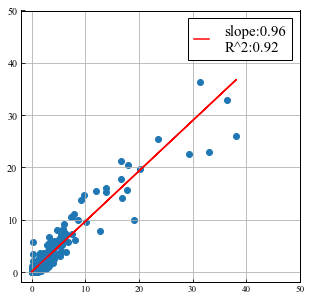

In [72]:
# dispgraphs.compare_graphs_scatter(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')
dispgraphs.compare_graphs_scatter(df_all_plus['Load_Avg_difference'], df_qcalc_over5 , linear_regression=True)
plt.xlim(-2, 50)
plt.ylim(-2, 50)

# 倍率32倍(チャンネル６)だけで流砂量予測をしたものの精度

In [73]:
just_once_count = 0

In [74]:
df_ch6 = getdfs.get2017cleanedmean_pit_true()

#使うcolumn
if just_once_count == 0:
    cols_ch6 = ['hp_Tot(6)'] + ['Load_Avg', 'Velocity(m/s)', 'Load_Avg_difference']
    just_once_count += 1
    
    print('COL_USE :' +  str(cols_ch6))
    
    df2017_ch6 = getdfs.get2017cleanedmean_pit_true()
    df2017_ch6 = df2017_ch6[cols_ch6]
    
    list_df2018_3events_ch6 = getdfs.get2018_3events_mean()
    for i, df2018_each in enumerate(list_df2018_3events_ch6):
        list_df2018_3events_ch6[i] = df2018_each[cols_ch6]
    
    df_all_ch6 = pd.DataFrame()
    df_all_ch6 = df_all_ch6.append(df2017_ch6)
    del df2017_ch6

    for i, df2018_each in enumerate(list_df2018_3events_ch6):
        df_all_ch6 = df_all_ch6.append(df2018_each)
        
    del list_df2018_3events_ch6
    
    

    
else:
    print('COL_USE :' +  str(cols_use))
    print('Passed')

COL_USE :['hp_Tot(6)', 'Load_Avg', 'Velocity(m/s)', 'Load_Avg_difference']


KeyError: "['Velocity(m/s)'] not in index"

In [ ]:
df2017_ch6.columns

決定係数は0.89と、それなりに良いが、粒径毎の手法method2と同程度の決定係数である。

In [ ]:
# dispgraphs.compare_graphs_scatter(df_qcalc_over5, df_all['Load_Avg_difference'], start='2016-06-25 02:00:00', end='2016-7-01 06:00:00')
dispgraphs.compare_graphs_scatter(df_all_ch6['Load_Avg_difference'], df_all_ch6['hp_Tot(6)'] , linear_regression=True)

# ふるい結果

下のデータフレームは、ピット内のふるい結果である。上から、表面から-30cm、-45cm、-60cmの位置の土砂である。

In [75]:
df_furui = getdfs.get_furui()

In [76]:
x_furui = [1, 2, 5, 7, 9, 15, 31.5, 50] #furui粒径界の上限
x_tot = [2, 5, 6, 7, 8.5, 10, 12.5, 15, 20, 30, 50] #Tot粒径界の上限
g_furui = ['-1mm(g)', '1-2mm(g)', '2-5mm(g)', '5-7mm(g)', '7-9mm(g)', '9-15mm(g)', '19-31.5mm(g)', '31.5mm-(g)']
percent_furui = ['-1mm(%)', '1-2mm(%)', '2-5mm(%)', '5-7mm(%)', '7-9mm(%)', '9-15mm(%)', '19-31.5mm(%)', '31.5mm-(%)']
df_furui

,31.5mm-(g),19-31.5mm(g),9-15mm(g),7-9mm(g),5-7mm(g),2-5mm(g),1-2mm(g),-1mm(g),31.5mm-(%),19-31.5mm(%),9-15mm(%),7-9mm(%),5-7mm(%),2-5mm(%),1-2mm(%),-1mm(%)
TIMESTAMP,,,,,,,,,,,,,,,,
2017-11-23,134,507,1120,804,1557,2718,2163,3079,1.109088,4.196325,9.269988,6.654527,12.886939,22.496275,17.902665,25.484191
2017-11-23,0,61,423,439,1671,4498,3408,2147,0.000000,0.482328,3.344667,3.471179,13.212620,35.565747,26.947102,16.976358
2017-11-23,0,81,697,1091,2481,4775,2073,1296,0.000000,0.648311,5.578678,8.732191,19.857532,38.218345,16.591964,10.372979
2018-04-28,1172,1713,1690,787,1046,2125,2447,3634,8.019707,11.721637,11.564253,5.385247,7.157520,14.540851,16.744218,24.866566
2018-04-28,901,1223,1678,747,1226,2395,2619,3697,6.219798,8.442634,11.583598,5.156703,8.463344,16.533204,18.079525,25.521193
2018-04-28,1267,1086,1981,823,1174,2340,2386,3213,8.878767,7.610371,13.882270,5.767344,8.227050,16.398038,16.720392,22.515767
2018-07-16,387,551,975,372,530,1269,2048,3800,3.896496,5.547725,9.816754,3.745469,5.336287,12.776883,20.620217,38.260169
2018-07-16,458,678,1240,417,560,974,1211,2502,5.696517,8.432836,15.422886,5.186567,6.965174,12.114428,15.062189,31.119403
2018-07-16,866,854,814,409,591,1249,1491,2556,9.807475,9.671574,9.218573,4.631937,6.693092,14.144960,16.885617,28.946772


左図：ピットふるい3日分×3つの位置(-30cm、-45cm、-60cm)＝9データをプロット。粒度分布百分率  
    右図：ピットの下の方と上の方はあまり1イベントを表しているとは言い難い(底には細かいのが多く、上の方は細かいのが流れて大きな流砂が多いなど)ため、真ん中(-45cm)のデータのみを抽出

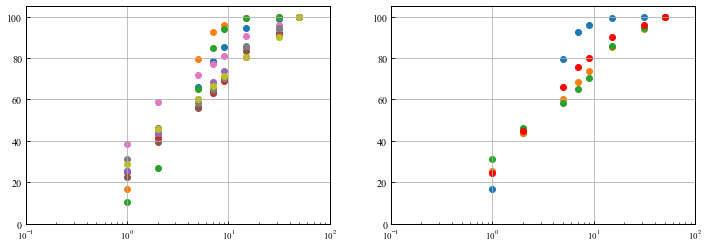

In [77]:
###すべてグラフ出力######

fig = plt.figure(figsize=(12,4))
ax1 = plt.subplot(1,2,1) 

for i in range(9):
    furui_percent_cumsum = np.cumsum(df_furui[i:i+1][percent_furui], axis=1)
    ax1.scatter(x_furui, furui_percent_cumsum)
    ax1.set_xscale('log')
    ax1.set_ylim(0,105)
    ax1.set_xlim((0.1), 100)
#########################

###３つの平均を算出######
furui_percents = [0]*len(percent_furui)
for i in range(1, 9, 3):
    furui_percents = furui_percents + np.array(df_furui[i:i+1][percent_furui])
furui_percent_cumsums = np.cumsum(furui_percents, axis=1).flatten()
furui_percent_cumsum_mean =  furui_percent_cumsums/3
#########################

###真ん中のデータのみグラフ出力######
ax2 = plt.subplot(1,2,2) 
for i in range(1, 9, 3):
    furui_percent_cumsum = np.cumsum(df_furui[i:i+1][percent_furui], axis=1)
    ax2.scatter(x_furui, furui_percent_cumsum)
    ax2.set_xscale('log')
    ax2.set_ylim(0,105)
    ax2.set_xlim((0.1), 100)

# ３つの平均をグラフ出力(赤)##
ax2.scatter(x_furui, furui_percent_cumsum_mean, c="red")
#########################

In [78]:
furui_percent_cumsum_mean

array([ 24.53898463,  44.56859003,  65.97304975,  75.52009563,
        80.124912  ,  90.24196208,  96.02789472, 100.        ])

In [79]:
#直線近似
# y=mx+n
# ２点を通る方程式を返却
# (y=数値) or (x=数値) or (y=mx+n)
def makeLinearEquation(x1, y1, x2, y2):
    line = {}
    if y1 == y2:
        # y軸に平行な直線
        line["y"] = y1
    elif x1 == x2:
        # x軸に平行な直線
        line["x"] = x1
    else:
        # y = mx + n
        line["m"] = (y1 - y2) / (x1 - x2)
        line["n"] = y1 - (line["m"] * x1)
    return line

def calc_y(line, dia):
#     print("y=mx+n : ",line)
    percent = line["m"]*dia + line["n"]
#     print("pecent : ", percent)
    return percent
    

x= np.insert(x_furui, 0, 0)
y= np.insert(furui_percent_cumsum_mean, 0, 0)

def calcPercent(dia):
    """
    粒径から通過百分率のパーセントを算出する
    各プロット毎に直線近似
    """
    if (dia >= x[0]) & (dia < x[1]):
        line = makeLinearEquation(x[0], y[0], x[1], y[1])
        percent = calc_y(line, dia)

    elif (dia >= x[1]) & (dia < x[2]):
        line = makeLinearEquation(x[1], y[1], x[2], y[2])
        percent = calc_y(line, dia)

    elif (dia >= x[2]) & (dia < x[3]):
        line = makeLinearEquation(x[2], y[2], x[3], y[3])
        percent = calc_y(line, dia)

    elif (dia >= x[3]) & (dia < x[4]):
        line = makeLinearEquation(x[3], y[3], x[4], y[4])
        percent = calc_y(line, dia)

    elif (dia >= x[4]) & (dia < x[5]):
        line = makeLinearEquation(x[4], y[4], x[5], y[5])
        percent = calc_y(line, dia)

    elif (dia >= x[5]) & (dia < x[6]):
        line = makeLinearEquation(x[5], y[5], x[6], y[6])
        percent = calc_y(line, dia)

    elif (dia >= x[6]) & (dia < x[7]):
        line = makeLinearEquation(x[6], y[6], x[7], y[7])
        percent = calc_y(line, dia)

    elif (dia >= x[7]) & (dia <= x[8]):
        line = makeLinearEquation(x[7], y[7], x[8], y[8])
        percent = calc_y(line, dia)
        
    else:
        print("Diameter is out of range")
        
    return percent

In [80]:
def calc_dia_rate(max_dia, min_dia):
    rate = calcPercent(max_dia) - calcPercent(min_dia)
    return rate/100

def calc_dia_from_percent(percent):
    try_dia = np.arange(0, 50, 0.1)
    
    dia_hold = []
    for dia in try_dia:
        dia_hold.append(calcPercent(dia))
    dia_hold = np.array(dia_hold)
    dia_hold = np.abs(dia_hold-percent)
    key = np.where(dia_hold == np.min(dia_hold))
    dia = try_dia[key]
    
    return dia

print("0mmと50mmの間の割合(100になるはず)：",calc_dia_rate(50, 0))
print("100%のときの粒径(50になるはず)：", calc_dia_from_percent(100))

0mmと50mmの間の割合(100になるはず)： 1.00000000001
100%のときの粒径(50になるはず)： [49.9]


In [81]:
# def calc_u_star_c_2(dia):
#     if dia*1000 >= 3.03:
#         u_star_c_2 = 80.9*dia
#     elif 1.18 <= dia*1000 < 3.03:
#         u_star_c_2 = 134.6*dia**(31/22)
#     elif 0.565 <= dia*1000 < 1.18:
#         u_star_c_2 = 55.0*dia
#     elif 0.065 <= dia*1000 < 0.565:
#         u_star_c_2 = 8.41*dia**(11/32)
#     elif 0 <= dia*1000 < 0.065:
#         u_star_c_2 = 226*dia
#     else:
#         print("Diameter is out of range")
# #     print(u_star_c_2)

#     return u_star_c_2/100

def calc_u_star_c_2(dia):
    if dia >= 3.03:
        u_star_c_2 = 80.9*dia
    elif 1.18 <= di < 3.03:
        u_star_c_2 = 134.6*dia**(31/22)
    elif 0.565 <= dia < 1.18:
        u_star_c_2 = 55.0*dia
    elif 0.065 <= dia < 0.565:
        u_star_c_2 = 8.41*dia**(11/32)
    elif 0 <= dia < 0.065:
        u_star_c_2 = 226*dia
    else:
        print("Diameter is out of range")
#     print(u_star_c_2)

    return u_star_c_2

def calc_tau_star_ci_by_tau_star_cm(di, dm):
    if di/dm >= 0.4:
        tauci_by_taucm = (math.log(19, 10))**2/(math.log(19*(dm/di), 10))**2
    elif di/dm < 0.4:
        tauci_by_taucm = 0.85*(dm/di)
        
    return tauci_by_taucm


In [83]:
def calc_R(WaterLevel, width):
    '''
    R=A/S
    A:面積
    S:
    '''
    A = WaterLevel*width
    S = 2*WaterLevel + width
    print('A :', A)
    print('S :', S)
    return A/S

def calc_u_star(R):
    return np.sqrt(grav*R*ib)

def calc_tau_star(u_star, R, dir):
    tau_star = (u_star**2)/((sigma_by_rho-1)*grav*dir)
    return tau_star

def calc_tau_star_i(u_star, R, di):
    u_star = calc_u_star(R)
    tau_star = (u_star**2)/((sigma_by_rho-1)*grav*di)
    return tau_star



def calc_u_star_e(U, R, dm, tau_star):
    '''
    Uは断面平均流速
    '''
    u_star_e = U/(6.0+5.75*math.log(R/(dm*(1+2*tau_star)),10))
    
    return u_star_e

def calc_tau_star_ei(di, u_star_e):
    tau_star_ei = (u_star_e**2)/((sigma_by_rho-1)*grav*di)
    
    return tau_star_ei
def calc_tau_star_c(d):
    u_star_c_2 = calc_u_star_c_2(d)
    tau_star_c = u_star_c_2/(s*grav*d)
    return tau_star_c
    
def calc_tau_star_cm(dm):
    tau_star_cm = calc_u_star_c_2(dm)/(s*grav*dm)
    return tau_star_cm

def calc_tau_star_ci(di, dm):
    tau_star_ci_by_tau_star_cm = calc_tau_star_ci_by_tau_star_cm(di, dm)
    tau_star_cm = calc_tau_star_cm(dm)
    tau_star_ci = tau_star_ci_by_tau_star_cm*tau_star_cm
    
    return tau_star_ci
    
dm = calc_dia_from_percent(50)
print("粒径中央値[mm]：", dm)
# dm = dm/10
# print('dm(cm)', dm)
dm = dm/1000
print('dm(m)', dm)
rho = 1000 #kg/m3
# rho = 1 #g/cm3
grav = 9.8 #m/s**2
# grav = 980 #cm/s**2
ib = 1/20 #? パーセント？角度？
s = 1.65
# myu = 0.01#cm**2/s
width = 5#m
# width = 500#cm


sigma_by_rho = 2.65

#ρs=2.65g/cm3
# rho_s = 2650 #kg/m**3
rho_s = 2.65 #g/m**3


WaterLevel = np.array(df_all['WaterLevel(cm)'][i:i+1])
print('WaterLevel(cm) :', WaterLevel)
# WaterLevel = np.array(df_all['WaterLevel(cm)'][i:i+1])*0.01
# print('WaterLevel(m) :', WaterLevel)
R = calc_R(WaterLevel, width)
print('R : ', R)

u_star = calc_u_star(R)
print('u_star : ', u_star)
u_star_cm_2 = calc_u_star_c_2(dm)
print('u_star_cm_2 : ', u_star_cm_2)
tau_star_cm = calc_tau_star_cm(dm)
print('tau_star_cm : ', tau_star_cm)


粒径中央値[mm]： [2.8]
dm(m) [0.0028]
WaterLevel(cm) : [9.28853333]
A : [46.44266667]
S : [23.57706667]
R :  [1.96982378]
u_star :  [0.98245288]


NameError: name 'di' is not defined

In [ ]:
max_dia = 1.03
min_dia = 0.18

di = (max_dia + min_dia)/2
print('di[cm]', di)
# di = (max_dia + min_dia)/2/1000
# print('di[m]', di)

p_di = calc_dia_rate(max_dia, min_dia)
print("p_di : ", p_di)

In [ ]:
df_all.head()

In [ ]:
i=0
#Uは断面平均流速じゃないといけない！！これはたぶんおかしい！
U = np.array(df_all['Velocity(m/s)'][i:i+1])*100 #cm/s
# U = np.array(df_all['Velocity(m/s)'][i:i+1]) #m/s
print('U : ', U)

In [ ]:
u_star = calc_u_star(R)
print('u_star : ', u_star)

In [ ]:
tau_star = calc_tau_star(u_star=u_star, R=R, dir=di)
print('tau_star :', tau_star)

In [ ]:
u_star_e = calc_u_star_e(U, R, dm, tau_star)
print('u_star_e : ', u_star_e)

In [ ]:
# これがちがうかも？
tau_star_ei = calc_tau_star_ei(di, u_star_e)
print('tau_star_ei : ', tau_star_ei)

In [ ]:
tau_star_ci = calc_tau_star_ci(di, dm)
print('tau_star_ci : ', tau_star_ci)

In [84]:
tau_star_i = calc_tau_star_i(u_star, R, di)
print('tau_star_i : ', tau_star_i)

NameError: name 'di' is not defined

In [ ]:
u_star_ci = np.sqrt(calc_u_star_c_2(di))
print('u_star_ci : ', u_star_ci)

In [ ]:
q_bi = 17*p_di*u_star_e*di*tau_star_ei*(1-(tau_star_ci/tau_star_i))*(1-(u_star_ci/u_star))
print('p_di : ', p_di)
print('u_star_e : ', u_star_e)
print('di : ', di)
print('tau_star_ei : ', tau_star_ei)
print('tau_star_ci : ', tau_star_ci)
print('tau_star_i : ', tau_star_i)
print('u_star_ci : ', u_star_ci)
print('u_star : ', u_star)

# print('q_bi(m**3)', q_bi)
print('q_bi(cm**3)', q_bi)
q_weigh = q_bi*rho_s
print('q_weigh(g)', q_weigh)


In [ ]:
len(df_all)

# 現在地

In [88]:
# ashida_michiue.calc_q_ashida_michiue(df_all, max_dia=0.65, min_dia=0, dm=dm,
#                                         start='2017-09-21 00:00:00', end='2017-09-23 00:00:00',
#                                         interval=30)
q_bi_sum_each = []
q_weigh_sum_each = []

list_max_dia = [0.065, 0.565, 1.18, 3.03, 10, 30, 50]
list_min_dia = [0, 0.065, 0.565, 1.18, 3.03, 10, 30]

for max_dia, min_dia in zip(list_max_dia, list_min_dia):
    q_bi_sum, q_weigh_sum = ashida_michiue.calc_q_ashida_michiue(df_all, max_dia=max_dia, min_dia=min_dia, dm=dm,
                                        interval=30)
    q_bi_sum_each.append(q_bi_sum)
    q_weigh_sum_each.append(q_weigh_sum)

粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 0.0325
対象粒径界割合 p_di :  0.015950340011666665
q_bi(cm**3) [0.04473979]
q_weigh(g) [0.11856044]
粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 0.31499999999999995
対象粒径界割合 p_di :  0.12269492316666664
q_bi(cm**3) [0.4048537]
q_weigh(g) [1.07286231]
粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 0.8724999999999999
対象粒径界割合 p_di :  0.142797872869
q_bi(cm**3) [0.23591309]
q_weigh(g) [0.62516968]
粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 2.105
対象粒径界割合 p_di :  0.23773140927988887
q_bi(cm**3) [-0.00863686]
q_weigh(g) [-0.02288767]
粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 6.515
対象粒径界割合 p_di :  0.29893632481444454
q_bi(cm**3) [0.47348101]
q_weigh(g) [1.25472468]
粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 20.0
対象粒径界割合 p_di :  0.13690813830984852
q_bi(cm**3) [3.23449213]
q_weigh(g) [8.57140416]
粒径中央値 dm[cm]： [0.0028]
対象粒径平均値 di[cm] 40.0
対象粒径界割合 p_di :  0.044980991558484645
q_bi(cm**3) [3.4161397]
q_weigh(g) [9.05277022]


In [89]:
q_total = sum(q_bi_sum_each)
q_weigh_total = sum(q_weigh_sum_each)

print(q_total, q_weigh_total)

[7.80098257] [20.67260381]


In [90]:
print(q_bi_sum_each)

[array([0.04473979]), array([0.4048537]), array([0.23591309]), array([-0.00863686]), array([0.47348101]), array([3.23449213]), array([3.4161397])]


In [91]:
p_di = []

p_di.append(calc_dia_rate(50, 3.03))
# u_c_2.append()

p_di.append(calc_dia_rate(3.03, 1.18))
p_di.append(calc_dia_rate(1.18, 0.565))
p_di.append(calc_dia_rate(0.565, 0.065))
p_di.append(calc_dia_rate(0.065, 0))

print("p(di) : ", p_di)

p(di) :  [0.4808254546827777, 0.23773140927988887, 0.142797872869, 0.12269492316666664, 0.015950340011666665]


In [92]:
d = 1
tau_star_c = calc_tau_star_c(d)
q_mpm = 8*(np.sqrt(s*grav*d**3))*(tau_star - tau_star_c)**(1.5)

print(tau_star_c)
print(tau_star)
print(q_mpm)

NameError: name 'di' is not defined

In [93]:
x_for_graph = 
# y_approximate = ans.x[0]*np.sqrt(ans.x[1]*x_for_graph)
# y_approximate = ans.x[0]*np.log(ans.x[1]**x_for_graph + ans.x[2]*x_for_graph + ans.x[3])
# y_approximate = ans.x[0]*np.log(ans.x[1]*x_for_graph + ans.x[2])
y_approximate = sigmoid(x_for_graph, ans.x[0], ans.x[1], c=100)


#グラフ表示
plt.scatter(x, y, label='mean_furui')
# plt.plot(x, y1, label='1')
# plt.plot(x, y2, label='2')
plt.plot(x_for_graph, y_approximate, label='{}'.format(dimensions), c="r")
plt.xscale('log')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-93-42d3080047da>, line 1)

## 9/21(大粒径流砂が少ないイベント)に注目

In [94]:
# arg_dict = {
#             df : df_all_ch6
#             start : '2017-09-21 00:00:00'
#             end : '2017-09-23 00:00:00'
#             real_W : real_W_over5
#             Correction_factor : Correction_factor_tot5to10.x[-1]
#             percents_init : 95
#             diameter_init : 9   
    
#             }

In [95]:
start_921 = '2017-09-21 00:00:00'
# end_921 = df_2017_dia_mean_dropped_weigh.index[-1]
end_921 = '2017-09-23 00:00:00'
# end_921 = '2017-10-01 00:00:00'

In [96]:
qcalc_each = df_all_plus[names_of_center_over5][start_921:end_921].mul(np.array(real_W_over5).reshape(1,6)) * Correction_factor_tot5to10.x[-1]

In [ ]:
qcalc_each.head()

In [ ]:
qcalc_each.sum()

In [ ]:
percents = [95]
percents.extend(list(qcalc_each.sum()/qcalc_each.sum().sum()*(100-95)))
print(percents)

In [ ]:
real_W_over5

In [ ]:
def calc_diameter(x):
    r = ((3*x*1000)/(4*2.6*math.pi))**(1/3)*10
    diameter = 2*r
    return diameter

diameters = [9]
for x in real_W_over5:
    diameters.append(calc_diameter(x))
    

In [ ]:
diameters

In [ ]:
list(qcalc_each.sum())

In [ ]:
furui_percent_cumsum = np.cumsum(percents)
furui_percent_cumsum

In [ ]:
x_furui

In [85]:
x_furui = [1, 2, 5, 7, 9, 15, 31.5, 50] #furui粒径界の上限
x_tot = [2, 5, 6, 7, 8.5, 10, 12.5, 15, 20, 30, 50] #Tot粒径界の上限
g_furui = ['-1mm(g)', '1-2mm(g)', '2-5mm(g)', '5-7mm(g)', '7-9mm(g)', '9-15mm(g)', '19-31.5mm(g)', '31.5mm-(g)']
percent_furui = ['-1mm(%)', '1-2mm(%)', '2-5mm(%)', '5-7mm(%)', '7-9mm(%)', '9-15mm(%)', '19-31.5mm(%)', '31.5mm-(%)']


In [86]:
x_tot[-7:]

[8.5, 10, 12.5, 15, 20, 30, 50]

NameError: name 'percents' is not defined

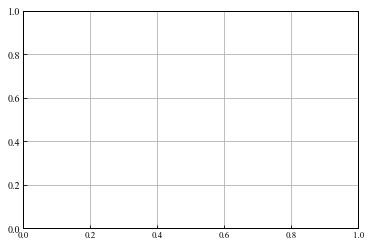

In [87]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1) 

furui_percent_cumsum = np.cumsum(percents)
ax.scatter(diameters, furui_percent_cumsum)
# ax.scatter(x_tot[-7:], furui_percent_cumsum)

ax.set_xscale('log')
ax.set_ylim(0,105)
ax.set_xlim((0.1), 100)


furui_percent_cumsum = np.cumsum(df_furui[1:2][percent_furui], axis=1)
ax.scatter(x_furui, furui_percent_cumsum)


ハイドロフォンで測れた流砂量の割合が低いため、その分流砂量を過小評価してしまっている(Cは一定値にしているため)

In [ ]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start=start_921, end=end_921)

## 7月16日（ふるい日）

In [ ]:
start_415 = '2018-04-15 0:00'
end_415 = '2018-04-28 0:00'

In [ ]:
qcalc_each = df_all_plus[names_of_center_over5][start_415:end_415].mul(np.array(real_W_over5).reshape(1,6)) * Correction_factor_tot5to10.x[-1]

In [ ]:
qcalc_each.sum()

In [ ]:
percents = [73]
percents.extend(list(qcalc_each.sum()/qcalc_each.sum().sum()*(100-73)))
print(percents)

In [ ]:
real_W_over5

In [ ]:
def calc_diameter(x):
    r = ((3*x*1000)/(4*2.6*math.pi))**(1/3)*10
    diameter = 2*r
    return diameter

diameters = [9]
for x in real_W_over5:
    diameters.append(calc_diameter(x))
    

In [ ]:
diameters

In [ ]:
furui_percent_cumsum = np.cumsum(percents)
furui_percent_cumsum

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = plt.subplot(1,1,1) 

furui_percent_cumsum = np.cumsum(percents)
ax.scatter(diameters, furui_percent_cumsum)
# ax.scatter(x_tot[-7:], furui_percent_cumsum)

ax.set_xscale('log')
ax.set_ylim(0,105)
ax.set_xlim((0.1), 100)


furui_percent_cumsum = np.cumsum(df_furui[4:5][percent_furui], axis=1)
ax.scatter(x_furui, furui_percent_cumsum)

ハイドロフォンで測れた流砂量の割合平均値に近いためか、流砂量を精度よく算出できている

In [ ]:
dispgraphs.compare_graphs_time_series(df_qcalc_over5, df_all['Load_Avg_difference'], start=start_415, end=end_415)

# 流砂量を求める

In [ ]:
def qcalc(df, list_weight, list_beta, C):
    df_weight = df.mul(list_weight.reshape(1,len(list_weight)))
    df_weight_corrected = df_w.mul(list_beta.reshape(1,6))
    df_w_corrected_sum = df_weight_corrected.sum(axis=1)*C
    
    return df_w_corrected_sum

In [ ]:
col_5to10 = names_of_center[4:]
print(col_5to10)

In [ ]:
df_weight = qcalc(df_all[col_5to10], list_weight=W_IDEAL[4:], 
                     list_beta=Correction_factor_tot5to10.x[:-1], C=Correction_factor_tot5to10.x[-1])

In [ ]:
df_weight.plot()

# 飽和を分ける

In [ ]:
df_true = getdfs.get_nosaturated_df(df_all_plus)

In [ ]:
df_true.isnull().sum(axis=1)

In [ ]:
df_true_1to10 = df_true[df_true.isnull().sum(axis=1) == 0]
print(len(df_true_1to10))
df_true_2to10 = df_true[df_true.isnull().sum(axis=1) == 1]
print(len(df_true_2to10))
df_true_3to10 = df_true[df_true.isnull().sum(axis=1) == 2]
print(len(df_true_3to10))
df_true_4to10 = df_true[df_true.isnull().sum(axis=1) == 3]
print(len(df_true_4to10))
df_true_5to10 = df_true[df_true.isnull().sum(axis=1) == 4]
print(len(df_true_5to10))
df_true_6to10 = df_true[df_true.isnull().sum(axis=1) == 5]
print(len(df_true_6to10))
df_true_7to10 = df_true[df_true.isnull().sum(axis=1) == 6]
print(len(df_true_7to10))
df_true_8to10 = df_true[df_true.isnull().sum(axis=1) == 7]
print(len(df_true_8to10))

In [ ]:
axes = dispgraphs.scatter_graphs(df_true_1to10, list_y_names=names_of_center, list_x_names=['Load_Avg_difference']*10
                             ,figsize=(3*4, 3*3), alpha=0.3)
# dispgraphs.scatter_graphs(df_true_2to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_3to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_4to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_5to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_6to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)
# dispgraphs.scatter_graphs(df_true_7to10, list_y_names=names_of_center, 
#                           list_x_names=['Load_Avg_difference']*10, figsize=(3*4, 3*3),
#                           overlap=True, axes=axes, alpha=0.3)

# 使用メモリ確認

In [115]:
i=0
names_of_cols = names_of_center[4:]
print(names_of_cols[i])
colnames_gamma = []
for i in range(len(names_of_cols)):
    colnames_gamma.append('gamma_' + names_of_cols[i])
    

colnames_gamma = ['gamma_'+ str(names_of_cols[i]) for i in range(len(names_of_cols))]
colnames_gamma


hp_Tot(5)


['gamma_hp_Tot(5)',
 'gamma_hp_Tot(6)',
 'gamma_hp_Tot(7)',
 'gamma_hp_Tot(8)',
 'gamma_hp_Tot(9)',
 'gamma_hp_Tot(10)']